# **STINTSY Machine Project**

### **S11 - BOOMBAYOT**
1. Canayon, Roger Jr.
2. Pangan, Yumi Ann
3. Vasquez, Ryan Clemence

---
---
# **Section I: Introduction to the problem/task and dataset**

### **Introduction to the Task**
Soccer betting, especially over/under betting, involves predicting whether the total goals in a match will be above or below a set number. Accurate predictions are crucial for bettors and traders who rely on real-time data to make informed decisions during live games.

This project aims to predict the number of additional goals in a soccer match using real-time in-game statistics like possession, shots on target, and defensive errors. By estimating scoring potential, the model can support decision-making in over/under betting and enhance live trading strategies and fan engagement.

### **Dataset Overview**
This project’s dataset includes 10,000 unique snapshots of soccer matches at various timestamps, capturing the state of a game through different in-game metrics. Each snapshot includes details on the current score, possession percentages, attempts, and cards, providing a rich dataset for building predictive models.


### **Problem Motivation**
The practical application of predicting match outcomes from live data is significant for team strategy and sports betting, as knowing influential factors—such as possession and dangerous attacks—can improve decision-making and potentially impact match strategies (Kuhn & Johnson, 2013).


---
---

# **Section 2: Description of the dataset**

### Dataset Overview
The dataset consists of 10,000 randomly selected snapshots from soccer matches, each capturing the in-game state at a specific timestamp. Each row represents a snapshot, detailing scores, possession, and other match features, which collectively provide a momentary overview of game dynamics (Anguera et al., 2018).

### Data Collection
This dataset was collected through in-game analytics systems that continuously monitor and record essential match metrics. Although highly detailed, this collection method might introduce minor noise due to the rapid state changes inherent in live sports (Yin & Leong, 2017).

### Dataset Structure 
- **Rows**: Each row represents a single timestamp during a soccer match.
- **Columns**: represents to each feature, plus the target of the our task

| Feature                    | Description                                                                                 |
|----------------------------|---------------------------------------------------------------------------------------------|
| `uuid   `                    | The unique identifier of the snapshot                                                      |
| `current_minute `            | The current minute of the in-play match (includes 15-minute half-time break)                 |
| `home_score`               | Goals scored by the home team as of this current_minute                                     |
| `away_score`                 | Goals scored by the away team as of this current_minute                                     |
| `home_yellow_cards`          | Yellow cards given to the home team as of this current_minute                               |
| `away_yellow_cards`          | Yellow cards given to the away team as of this current_minute                               |
| `home_red_cards`             | Red cards given to the home team as of this current_minute                                  |
| `away_red_cards`             | Red cards given to the away team as of this current_minute                                  |
| `home_attacks`               | Attacks attempted by the home team as of this current_minute                                |
| `away_attacks`               | Attacks attempted by the away team as of this current_minute                                |
| `home_dangerous_attacks`     | Dangerous attacks attempted by the home team as of this current_minute                      |
| `away_dangerous_attacks`     | Dangerous attacks attempted by the away team as of this current_minute                      |
| `home_corners`               | Corners awarded to the home team as of this current_minute                                  |
| `away_corners`               | Corners awarded to the away team as of this current_minute                                  |
| `home_off_target`            | Shots that didn't require goalkeeper intervention attempted by the home team               |
| `away_off_target`            | Shots that didn't require goalkeeper intervention attempted by the away team               |
| `home_on_target`             | Shots that required goalkeeper intervention attempted by the home team                     |
| `away_on_target`             | Shots that required goalkeeper intervention attempted by the away team                     |
|` home_possession`            | Ball possession percentage for the home team until this current_minute                      |
| `away_possession`            | Ball possession percentage for the away team until this current_minute                      |
| `final_delta`                | The target value: this represents how many goals are scored after the current_minute by any team|


<br>

---
---


# **Section 3: List of requirements**

### Python Libraries and Modules Used

1. **Data Manipulation**
- `numpy` - For numerical operations and array manipulations.
- `pandas` - For data manipulation and analysis (handling data frames).
- `scipy.stats` - For statistical functions.

2. **Data Cleaning and Preprocessing**
- `sklearn.impute.SimpleImputer` - For handling missing data by imputing values.
- `sklearn.preprocessing.StandardScaler` - For scaling features to zero mean and unit variance.
- `sklearn.preprocessing.MinMaxScaler` - For scaling features to a specific range (usually 0 to 1).
- `sklearn.model_selection.train_test_split` - For splitting data into training and test sets.
- `sklearn.model_selection.GridSearchCV` - For hyperparameter tuning using exhaustive search.

3. **Visualization**
- `matplotlib.pyplot` - For creating static, animated, and interactive visualizations in Python.
- `seaborn` - For statistical data visualization based on `matplotlib`.
- `sklearn.tree.plot_tree` - For visualizing decision trees.

4. **Machine Learning Models**
- `sklearn.linear_model.SGDRegressor` - For linear regression using stochastic gradient descent.
- `sklearn.neural_network.MLPRegressor` - For multi-layer perceptron regression.
- `sklearn.ensemble.RandomForestRegressor` - For Random Forest regression model.
- `sklearn.ensemble.ExtraTreesRegressor` - For Extra Trees regression model.

5. **Evaluation Metrics**
- `sklearn.metrics.mean_squared_error` - For calculating mean squared error.
- `sklearn.metrics.mean_absolute_error` - For calculating mean absolute error.
- `sklearn.metrics.r2_score` - For calculating the R² score.

6. **Custom Utilities**
- `random_forest_util.tune_random_forest` - For tuning Random Forest model.
- `random_forest_util.print_RF` - For printing Random Forest details.
- `random_forest_util.plot_learning_curve` - For plotting learning curves of models.

7. **Visualization Settings**
- `plt.rcParams` - For setting visualization preferences (e.g., figure size, interpolation).


In [42]:
# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Data Cleaning and Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Machine Learning Models
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Custom Utilities
from random_forest_util import tune_random_forest, print_RF, plot_learning_curve

# Visualization settings
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'


In [43]:
np.random.seed(42)

# **Section 4: Data preprocessing and cleaning**

### Cleaning Steps
- **Checking for Duplicates**: Removing redundant rows to ensure unique snapshots.
- **Type Conversion**: Ensuring all features are in suitable formats (e.g., integer for score-related features, float for percentages).
- **Handling Missing Values**: Uses techniques like imputation if necessary, based on the dataset's nature.
- **Outlier Detection**: Detects anomalies in numerical features, which may skew predictions if left unaddressed.

### **I. Load and Inspect the Data**
- Initial Check: Start by inspecting the data types, missing values, and unique values. This helps determine what cleaning actions are necessary (Han et al., 2011).
- Data Types: Confirm the data types for each column, ensuring numerical values are correctly identified for calculations and models.


In [44]:
df = pd.read_csv('sports.csv', index_col="uuid")
df.head()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
uuid,,,,,,,,,,,,,,,,,,,,
2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,29,26,4,1,4,0,4,6,48,52,1
869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,1
549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,62,38,4
287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,11,25,1,0,0,2,0,0,55,45,2
a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,21,46,1,1,0,3,4,4,45,55,0


In [45]:
df = df.reset_index(col_level=0)
df = df.drop('uuid', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   current_minute          7000 non-null   int64
 1   home_score              7000 non-null   int64
 2   away_score              7000 non-null   int64
 3   home_yellow_cards       7000 non-null   int64
 4   away_yellow_cards       7000 non-null   int64
 5   home_red_cards          7000 non-null   int64
 6   away_red_cards          7000 non-null   int64
 7   home_attacks            7000 non-null   int64
 8   away_attacks            7000 non-null   int64
 9   home_dangerous_attacks  7000 non-null   int64
 10  away_dangerous_attacks  7000 non-null   int64
 11  home_corners            7000 non-null   int64
 12  away_corners            7000 non-null   int64
 13  home_off_target         7000 non-null   int64
 14  away_off_target         7000 non-null   int64
 15  home_on_target       

#### Check Measures of Central Tendency of the Uncleaned Dataset

This step involves checking the measures of central tendency (mean, median, mode) of the uncleaned dataset to immediately identify potential anomalies before cleaning.

In [46]:
# Statistical Summaries of All Feature 
df.agg(['min', 'max', 'median', 'mean']).T

,min,max,median,mean
current_minute,-348.0,583.0,70.0,59.491571
home_score,0.0,8.0,0.0,0.796000
away_score,0.0,9.0,0.0,0.623143
home_yellow_cards,0.0,8.0,0.0,0.522429
away_yellow_cards,0.0,8.0,0.0,0.603143
home_red_cards,0.0,2.0,0.0,0.009286
away_red_cards,0.0,2.0,0.0,0.015714
home_attacks,0.0,255.0,43.0,46.365429
away_attacks,0.0,183.0,41.0,43.325143
home_dangerous_attacks,0.0,134.0,25.0,27.611429


### **II. Remove Unrealistic Values and Outliers, and Duplicates**
- Current Minute: Limit values between 0 and 105 (including a 90-minute match plus 15 minutes for half-time).
- Yellow Cards: Set a threshold of 5 yellow cards per team, as higher values are rare.
Attacks and Dangerous Attacks: Apply upper bounds of 150 for attacks and 100 for dangerous attacks, considering typical gameplay stats.

- Possession Percentages: Filter for rows where the sum of home_possession and away_possession is close to 100%, with a tolerance of ±2% to give way for rounding discrepancies

- final_delta: Filter out negative values, since goals should be a nonnegative value

In [47]:
# Filter for realistic match time
df = df[(df['current_minute'] >= 0) & (df['current_minute'] <= 105)]

# Limit yellow cards to realistic maximum
df = df[(df['home_yellow_cards'] <= 5) & (df['away_yellow_cards'] <= 5)]

# Limit attacks and dangerous attacks
df = df[(df['home_attacks'] <= 150) & (df['away_attacks'] <= 150)]
df = df[(df['home_dangerous_attacks'] <= 100) & (df['away_dangerous_attacks'] <= 100)]

# Check possession totals with a tolerance
df = df[np.isclose(df['home_possession'] + df['away_possession'], 100, atol=2)]


In [48]:
# Only include rows with nonnegative final_delta
df_len = len(df)
print(f'Number of rows: {df_len}')
df = df.drop(df[df['final_delta'] < 0].index)
print(f'After dropping: {len(df)} (-{df_len- len(df)})')

# df['final_delta']=df['final_delta'].apply(lambda x: 5 if x >= 5 else x)

Number of rows: 6732
After dropping: 6729 (-3)


In [49]:
# Remove duplicates
dupes = df.duplicated().sum()
print(f'Number of duplicate rows: {dupes}')

df_w_dupes = len(df)
df = df.drop_duplicates()

print(f'After dropping: {len(df)} (-{df_w_dupes - len(df)})')

Number of duplicate rows: 103
After dropping: 6626 (-103)


### **III. Simplify Features**
- For `current_minute`, disregard half-time break of 15 minutes since the snapshot does not change within this period

In [50]:
# if current_minute in (45,60) then set to 45 (currently on break)
# if current_minute > 60, subtract by 15
original_minutes = df['current_minute'].copy()

df['current_minute'] = df['current_minute'].apply(
    lambda x: 45 if x in [45, 60] else (x - 15 if x > 60 else x)
)

# Count the number of rows affected
rows_affected = (df['current_minute'] != original_minutes).sum()
print(f'Number of rows affected: {rows_affected}')

Number of rows affected: 3749


### **Final Validation**

We perform a few checks to ensure everything is in order.

- Ensure dataset is clean enough for Exploratory Data Analysis (EDA)
- Check final count of rows before EDA
 

Performing these checks helps us confirm that our data is clean and correctly structured for an accurate EDA and for the best possible model performance later on.


In [51]:
# Statistical Summaries of All Feature 
df.agg(['min', 'max', 'median', 'mean']).T

,min,max,median,mean
current_minute,0.0,90.0,54.0,49.591911
home_score,0.0,8.0,0.0,0.779807
away_score,0.0,9.0,0.0,0.608210
home_yellow_cards,0.0,5.0,0.0,0.497585
away_yellow_cards,0.0,5.0,0.0,0.573046
home_red_cards,0.0,2.0,0.0,0.008602
away_red_cards,0.0,2.0,0.0,0.014337
home_attacks,0.0,150.0,42.0,45.124660
away_attacks,0.0,148.0,40.0,42.445518
home_dangerous_attacks,0.0,100.0,24.0,26.820404


In [52]:
print(f"Final shape: {df.shape}")
df.head()

Final shape: (6626, 20)


,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,79,1,2,0,0,0,0,39,45,29,26,4,1,4,0,4,6,48,52,1
1,76,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,1
2,3,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,62,38,4
3,17,0,0,1,0,0,0,41,46,11,25,1,0,0,2,0,0,55,45,2
4,61,1,0,1,0,0,0,69,78,21,46,1,1,0,3,4,4,45,55,0


---

# **Section 5: Exploratory data analysis**

In order to gain a better understanding of our data, we perform an in-depth exploratory data analysis (EDA) on each feature. This process involves examining distributions, identifying patterns, and uncovering relationships between variables, which helps us detect potential issues such as missing values, outliers, or skewed distributions. By doing so, we aim to gather insights that help us to determine meaningful features, inform feature engineering, and improve overall data-driven decision-making.

In our EDA, we will be giving special focus on the `final_delta` column as it our target variable in our regression tasks. We attempt to determine which features are most impactful to this target variable, and if there are any notable correlations or trends that can guide our modeling efforts.

### **1. Distribution of Target Feature**

We explore how our target variable, `final_delta`, is distributed across the dataset. Understanding this distribution helps identify common and rare values, informing potential adjustments in model focus.

final_delta,0,1,2,3,4,5,6,7,8,9,10
count,1986,2017,1329,698,357,145,61,21,5,6,1


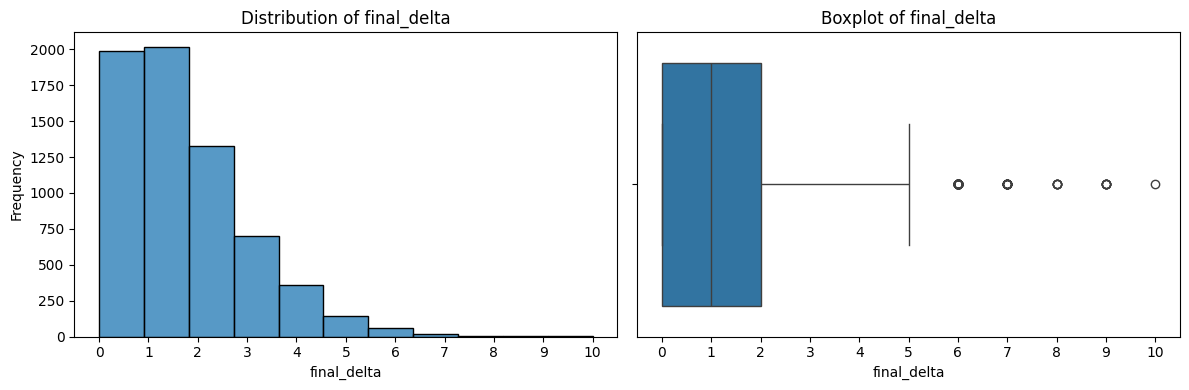

In [12]:
# actual counts
final_delta_counts = df['final_delta'].value_counts().sort_index()
display(pd.DataFrame(final_delta_counts).T)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram plot
sns.histplot(df['final_delta'], ax=axes[0], bins=int(df['final_delta'].max() - df['final_delta'].min() + 1), kde=False)
axes[0].set_title("Distribution of final_delta")
axes[0].set_xlabel("final_delta")
axes[0].set_ylabel("Frequency")
axes[0].set_xticks(range(int(df['final_delta'].min()), int(df['final_delta'].max()) + 1))

# Boxplot
sns.boxplot(x=df['final_delta'], ax=axes[1])
axes[1].set_title("Boxplot of final_delta")
axes[1].set_xlabel('final_delta')
axes[1].set_xticks(range(int(df['final_delta'].min()), int(df['final_delta'].max()) + 1))

plt.tight_layout()
plt.show()

The distribution of final_delta shows a clear skew towards lower values, with the majority of occurrences concentrated in the 0-2 range, indicating that most events involve small changes in the outcome. As the value of final_delta increases, the frequency of occurrences decreases sharply.

This may complicate our machine learning models later, as the data is highly imbalanced and biased towards lower final_delta values. This is a sign that some sort of processing should be done later. 

### **2. Feature Correlation with Target**

In this section, we explore how each feature relates to the target value, `final_delta`. By examining these correlations, we can understand which features might be significant in predicting the outcome.

Features with high positive or negative correlations are potentially more influential and may play a significant role in our predictive models.

/var/folders/jq/d50xb24x3y7bkfcmvrc433740000gn/T/ipykernel_90516/4083220751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


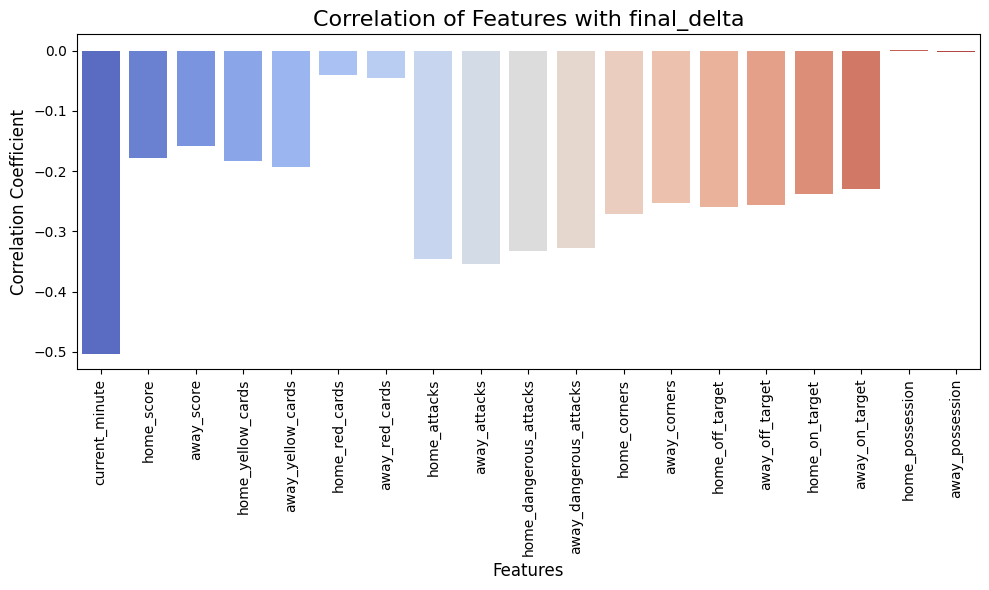

current_minute           -0.503000
home_score               -0.178096
away_score               -0.158045
home_yellow_cards        -0.183926
away_yellow_cards        -0.193081
home_red_cards           -0.040799
away_red_cards           -0.044927
home_attacks             -0.346378
away_attacks             -0.353528
home_dangerous_attacks   -0.332882
away_dangerous_attacks   -0.326906
home_corners             -0.271910
away_corners             -0.252431
home_off_target          -0.260211
away_off_target          -0.256347
home_on_target           -0.237373
away_on_target           -0.229614
home_possession           0.001871
away_possession          -0.001960
Name: final_delta, dtype: float64


In [13]:
# Calculate correlation of each feature with `final_delta`
correlations = df.corr()['final_delta'].drop('final_delta')

# Plot the correlation graph
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')

plt.xticks(rotation=90)
plt.title('Correlation of Features with final_delta', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()
print(correlations)

### **3. Pairwise Feature Correlation**

Here, we dive into the relationships between different features by analyzing their correlations with one another.

- **Insight**: Highly correlated features might be redundant. Understanding these interactions can guide us in deciding whether to combine or remove certain features for model efficiency.

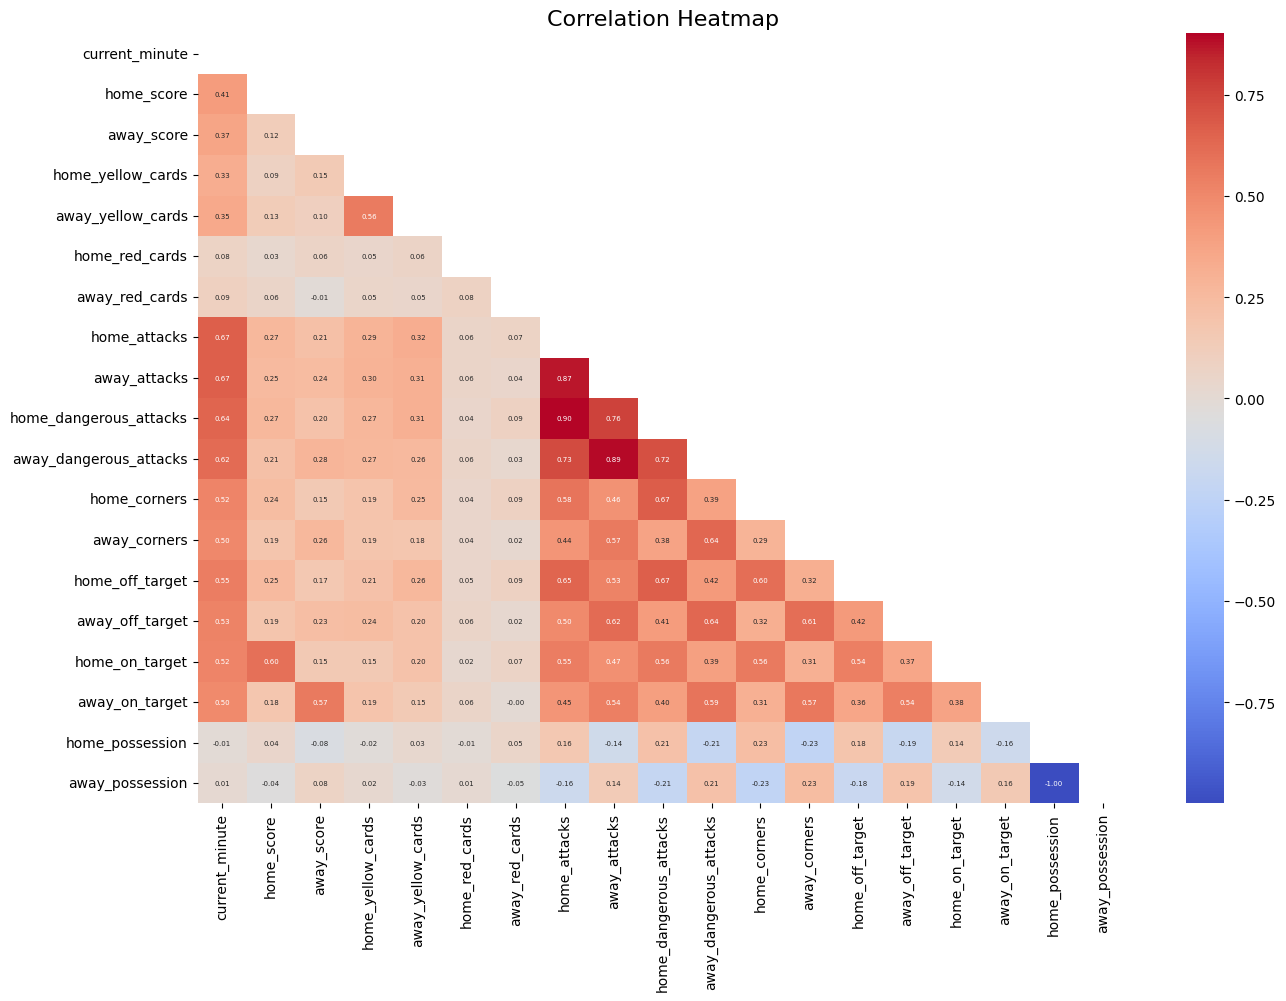

In [14]:
corr_matrix = df.drop('final_delta', axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, mask=mask, ax=ax, annot=True, annot_kws={'size': 5}, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In general, the attack-related features have high positive correlations with each other. Using these simultaneously can be problematic  as it can lead to several issues, particularly when using regression models that are sensitive to **multicollinearity**. This means there is a need to do some feature selection or a transformation that would generalize these to a single feature. 

As for the two possession features, these are perfectly correlated because it is understood that these two add up to 100%. This also means that this correlation is **not that meaningful** for our study as it only proves that there is a redundancy of features in the dataset. 

### **4. Analysis of Attack-related Features Over Time**

This analysis examines how certain features evolve as a match progresses. This helps us spot patterns or consistent changes throughout the game, which can provide strategic insights into periods of higher activity or scoring opportunities.

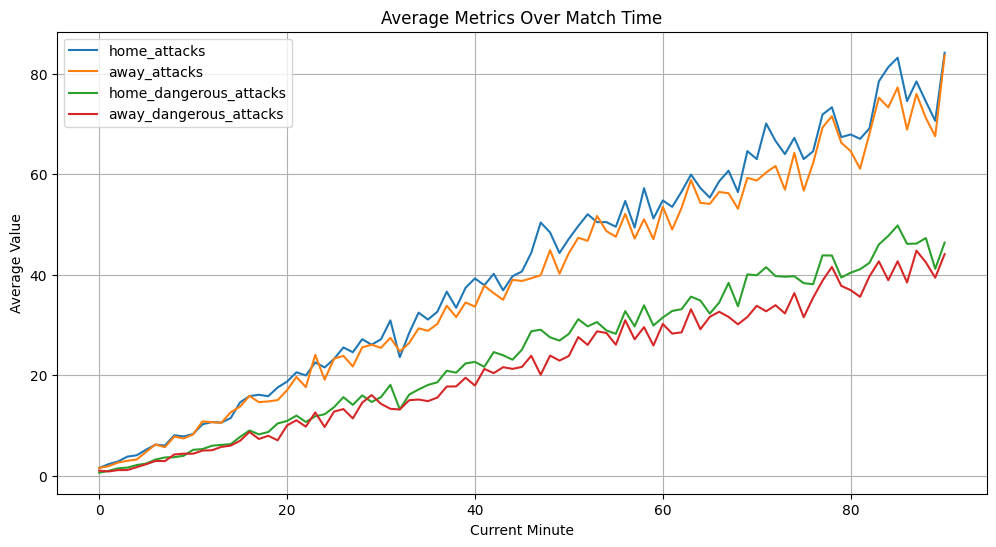

In [15]:
# Group by current_minute and calculate mean values for key metrics
time_analysis = df.groupby('current_minute').mean()
time_metrics = ['home_attacks', 'away_attacks', 'home_dangerous_attacks', 'away_dangerous_attacks']

plt.figure(figsize=(12, 6))
for metric in time_metrics:
    plt.plot(time_analysis.index, time_analysis[metric], label=metric)
plt.title("Average Metrics Over Match Time")
plt.xlabel("Current Minute")
plt.ylabel("Average Value")
plt.legend()
plt.grid()
plt.show()


The plot reveals a clear trend of increasing attack frequency as the match progresses, suggesting that teams become more aggressive as time elapses. 

Along with the fact that these features are highly correlated with each other and they seem to have the same behavior with respect to match time, it may be useful to consider reducing dimensionality by combining or transforming these features into combined features. It may improve our models later as it avoids the issue of multicollinearlity.

### **5. Distribution of Other Match Statistics**

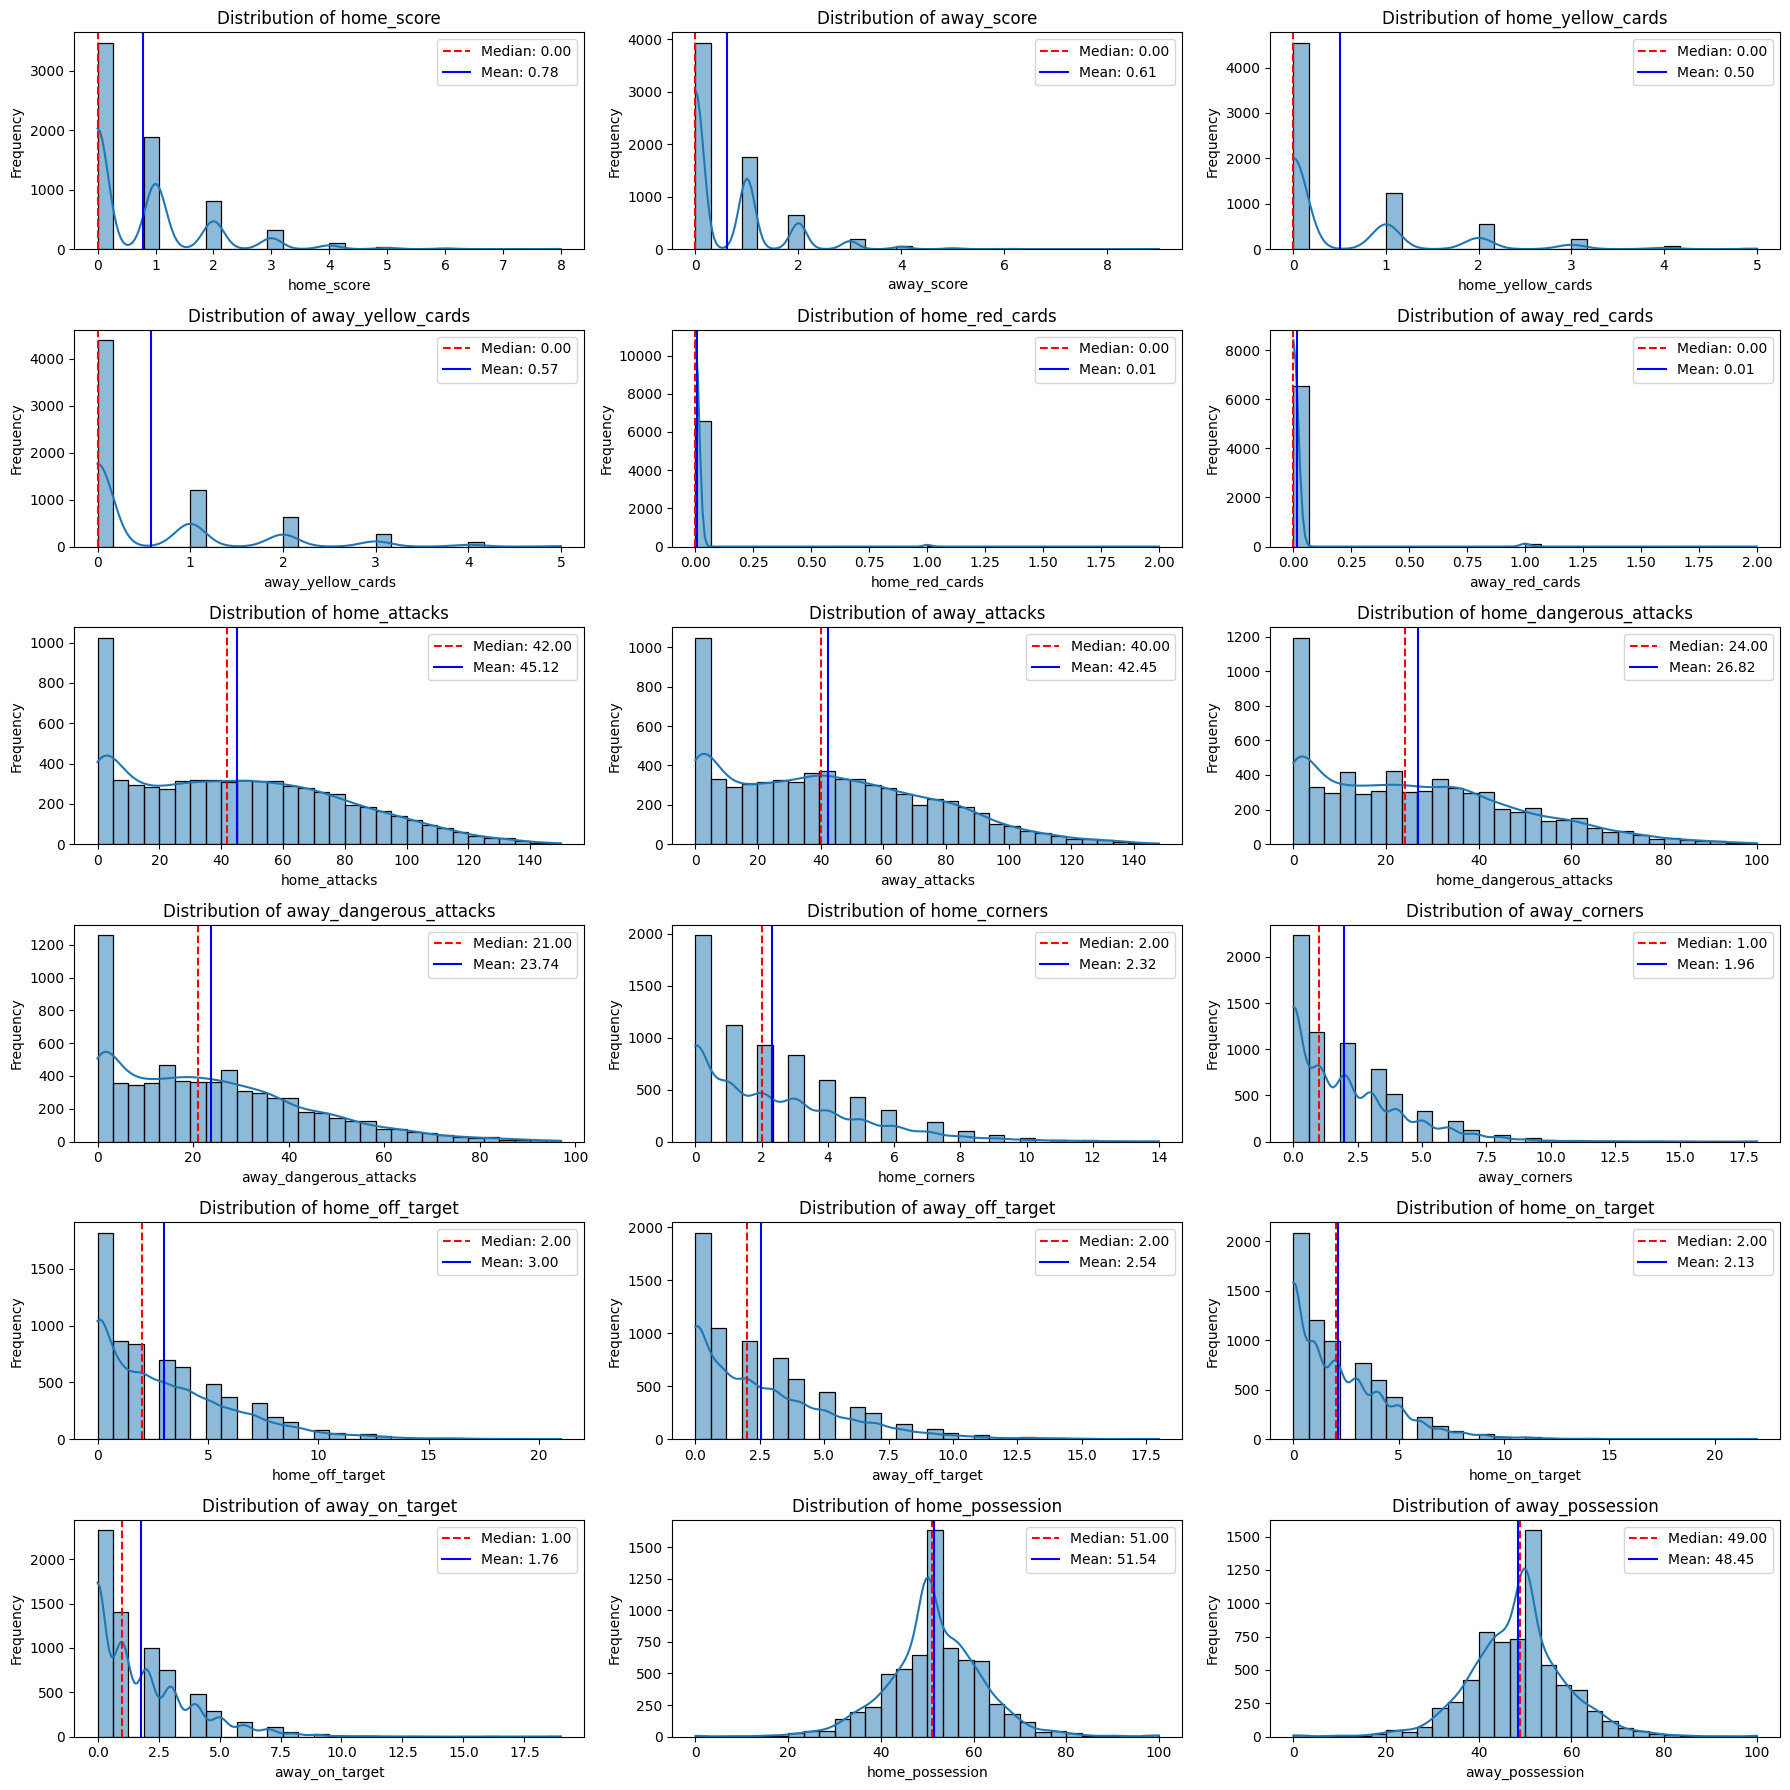

In [16]:
features = df.drop(['current_minute', 'final_delta'], axis=1)

n_cols = 3 
n_rows = len(features.columns) // n_cols + (1 if len(features.columns) % n_cols else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3))
axes = axes.flatten()

# Plot each feature's histogram
for i, col in enumerate(features.columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], )
    
    # Calculate median and mean
    median = df[col].median()
    mean = df[col].mean()

    # Plot vertical lines for the median and mean
    axes[i].axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
    axes[i].axvline(mean, color='blue', linestyle='-', label=f'Mean: {mean:.2f}')
    
    
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    
    # Add legend to show median and mean
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

*General Observations*

- Many features exhibit right-skewed distributions, indicating a concentration of values on the lower end with a tail extending towards higher values. Due to varying scales and distributions, feature scaling techniques like normalization or standardization may be needed before feeding these to our regression models later on.

### **Summary of EDA Results**

1. The distribution of `final_delta` is severely uneven as it shows a clear skew towards lower values, with the most of occurrences concentrated in the 0-2 range.

2. The `current_minute` variable has the highest direct correlation with the target. Possession-related features have little-to-no direct correlation and Card-related features have relatively low correlation as well.

3. In terms of pairwise correlation of features, the attack-related features have high correlation with each other. 

4. There is a clear trend of increasing attack frequency as the match progresses.

5. Most of our features exhibit a right-skewed distribution, this implies a need for standardization / normalization techniques to remedy this.

## **Post-EDA Data Preprocessing**

### **1. Handling Outliers of `final_delta`**
We cap the values of final_delta at 5, motivated by the fact that values greater than 5 were identified as outliers during the EDA. These unusually high values, while rare, do not align with typical match outcomes and could distort the analysis. By capping these values instead of dropping them, we retain the data while mitigating the influence of outliers on subsequent analyses.

In [53]:
# Cap final_delta at 5
df['final_delta'] = df['final_delta'].apply(lambda x: 5 if x >= 5 else x)

### **2. Feature Engineering**

As observed in the EDA, dangerous and non-dangerous attacks are highly correlated, leading to redundancy in the features. Additionally, non-dangerous attacks have shown a stronger correlation with final_delta. Therefore, we generalize both features with respect to match time to simplify the dataset.

In [54]:
new_df = df.copy()
new_df['home_attacks'] += new_df['home_dangerous_attacks'] 
new_df['away_attacks'] += new_df['away_dangerous_attacks']

new_df['home_attacks_per_minute'] = new_df.apply(lambda row: row['home_attacks'] / row['current_minute'] if row['current_minute'] != 0 else 0, axis=1)
new_df['away_attacks_per_minute'] = new_df.apply(lambda row: row['away_attacks'] / row['current_minute'] if row['current_minute'] != 0 else 0, axis=1)

new_df

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,...,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta,home_attacks_per_minute,away_attacks_per_minute
0,79,1,2,0,0,0,0,68,71,29,...,1,4,0,4,6,48,52,1,0.860759,0.898734
1,76,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50,50,1,0.000000,0.000000
2,3,0,0,0,0,0,0,4,1,1,...,0,0,0,0,0,62,38,4,1.333333,0.333333
3,17,0,0,1,0,0,0,52,71,11,...,0,0,2,0,0,55,45,2,3.058824,4.176471
4,61,1,0,1,0,0,0,90,124,21,...,1,0,3,4,4,45,55,0,1.475410,2.032787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,32,0,0,0,0,0,0,25,38,9,...,1,1,2,0,1,45,55,0,0.781250,1.187500
6996,86,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,50,50,0,0.000000,0.000000
6997,63,1,0,0,0,0,0,144,100,73,...,0,5,5,7,0,61,39,2,2.285714,1.587302
6998,57,2,0,0,0,0,0,131,86,46,...,0,4,1,2,1,52,48,0,2.298246,1.508772


We can also create more features that can be inferred from our current set of features. 

- **Goal Difference**:
  - *What it is*: The difference in the number of goals scored by the home team and the away team. This helps us see which team is leading.
  - *Why it's useful*: Knowing who is ahead can be crucial for predicting the match outcome.
- **Attack Efficiency**:
  - *What it is*: This shows how well a team turns their attacks into shots on target. It's calculated by dividing the number of on-target shots by the total number of shots (on target + off target).
  - *Why it's useful*: Teams that are good at this usually have a better chance of scoring goals.
- **Possession Balance**:
  - *What it is*: The difference between the possession percentages of the home team and the away team. It shows which team is controlling the game.
  - *Why it's useful*: The team with more possession often dictates the game's pace and strategy.
  
By adding these features, we hope to give our models more valuable information that can lead to more accurate predictions. 

In [55]:
# Create engineered features
df['goal_difference'] = df['home_score'] - df['away_score'] 
df['home_attack_efficiency'] = df['home_on_target'] / (df['home_on_target'] + df['home_off_target'] + 1e-5)
df['away_attack_efficiency'] = df['away_on_target'] / (df['away_on_target'] + df['away_off_target'] + 1e-5)
df['possession_balance'] = df['home_possession'] - df['away_possession']

---

# **Section 6-8 : Initial Training, Error Analysis, and Improving The Models**



The general setup for our our three models in terms of preparing our dataset for training is described as follows:

|                   | **Value**                |
|--------------------------------|--------------------------|
| Training set                   | 70% of the entire dataset |
| Testing set                    | 30% of the entire dataset |
| Number of cross-validation sets| 5                        |
| Random state                   | 42                       |

## ***6.1: Linear Regression using Schotastic Gradient Descent***

Linear Regression has always been a standard model in regression tasks due to its simplicity, interpretability, and effectiveness in modelling linear relationships between variables. While it assumes a linear relationship, it can actually also be extended to handle more complex, non-linear patterns by transformation the features into a higher degree, simulating polynomial regression.


### **A. Initial Model Training**

For our baseline regression model, we will use Linear Regression with Stochastic Gradient Descent (SGD). The model will maintain an regression order of 1 for now to evaluate the direct relationship between features and the target before exploring more complex feature interactions, providing a benchmark for comparison with advanced regressors.

### Feature Selection

The following table summarizes my justification of why I excluded the features from my training data:

| Feature Group                     | Specific Features                                             | Reason for Dropping                                                                 |
|------------------------------------|---------------------------------------------------------------|-------------------------------------------------------------------------------------|
| **Card-Related Features**          | `home_yellow_cards`, `away_yellow_cards`, `home_red_cards`, `away_red_cards` | Weak correlation with `final_delta`; behavior-based features that may not directly impact match outcomes. |
| **Possession Features**            | `home_possession`, `away_possession`                           | Near-zero correlation with `final_delta`; possession statistics alone are not strong predictors of the final score difference. |
| **Attack Features**                | `home_attacks`, `away_attacks`, `home_dangerous_attacks`, `away_dangerous_attacks` | Feature-engineered into `home_attacks_per_minute` and `away_attacks_per_minute` |

In [20]:
X = new_df.drop(["final_delta",  
                'home_yellow_cards', 'away_yellow_cards', 
                'home_red_cards', 'away_red_cards', 
                'home_possession', 'away_possession', 
                'home_attacks', 'away_attacks', 
                'home_dangerous_attacks', 'away_dangerous_attacks'], 
                axis=1) 
y = df['final_delta']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("------------------------------")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X: (6626, 11)
Shape of y: (6626,)
------------------------------
Shape of X_train: (5300, 11)
Shape of X_test: (1326, 11)


### Resampling the Training Set 

We found during EDA earlier that the spread of our target variable is severely uneven, with a bias to low values. To remedy this, we can **oversample** the values with low counts. In oversampling, we use SMOTE.

SMOTE (Synthetic Minority Oversampling Technique) works by generating synthetic samples for the minority class rather than simply duplicating existing ones. It does this by selecting a data point from the minority class, finding its k-nearest neighbors, and creating new samples along the line segments connecting the point to its neighbors, thereby increasing diversity in the oversampled data.

In [21]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)

# Generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Shape of X_train: (5300, 11)
Shape of X_train_resampled: (9810, 11)


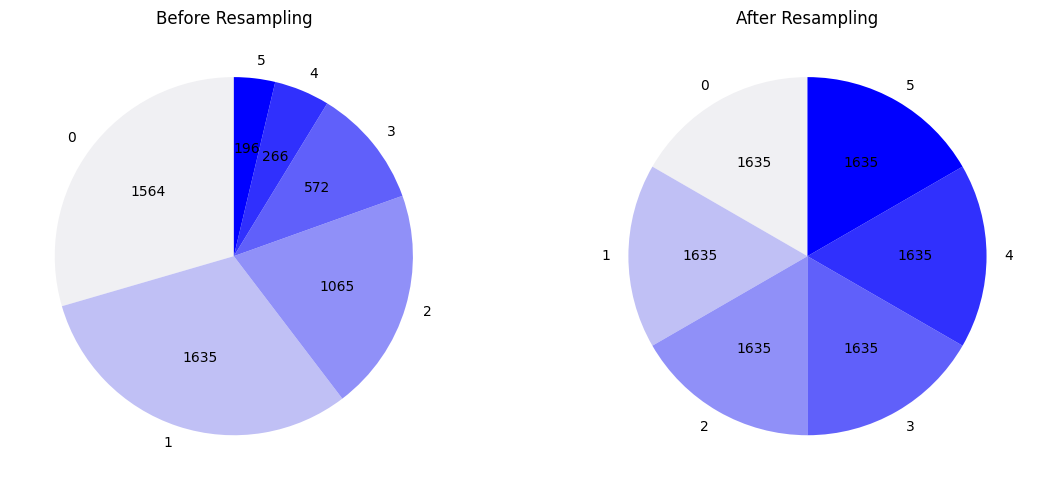

In [22]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define pastel colors
colors = sns.light_palette("blue", n_colors=6)


# Before resampling
axes[0].pie(y_train.value_counts().sort_index().values, 
            labels=y_train.value_counts().sort_index().index, 
            autopct=lambda p: f'{int(p * sum(y_train.value_counts().sort_index().values) / 100)}', 
            startangle=90, colors=colors)
axes[0].set_title('Before Resampling')

# After resampling
axes[1].pie(y_train_resampled.value_counts().sort_index().values, 
            labels=y_train_resampled.value_counts().sort_index().index, 
            autopct=lambda p: f'{int(p * sum(y_train_resampled.value_counts().sort_index().values) / 100)}', 
            startangle=90, colors=colors)
axes[1].set_title('After Resampling')

plt.tight_layout()
plt.show()


### Training the Baseline Model 

Starting Parameters:

| Parameter          | Value      |
|--------------------|------------|
| Penalty       | Lasso (L1) |
| Max epochs | 10000     |
| Tolerance     | 1e-6       |
| learning Rate  | 1e-6       |

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', SGDRegressor(
        penalty='l1',
        max_iter=10000,
        tol=1e-6,  
        verbose=0,
        random_state=42,
        learning_rate='constant',
        eta0=1e-6 
    )),
])

display(pipeline.fit(X_train_resampled, y_train_resampled))

weights = pd.DataFrame({
    'Feature': X_train.columns,
    'coef': pipeline['linreg'].coef_
})

weights = pd.concat(
    [weights, pd.DataFrame({'Feature': ['bias'], 
                            'coef':[pipeline['linreg'].intercept_]})],
    ignore_index=True
)

weights = weights.set_index('Feature').T
display(weights)

# Get training score
train_preds = pipeline.predict(X_train_resampled)
train_preds = np.round(train_preds).astype(int)

train_rmse = np.sqrt(mean_squared_error(train_preds, y_train_resampled))
train_mse = mean_squared_error(train_preds, y_train_resampled)
train_r2 = r2_score(train_preds, y_train_resampled)

# Get testing score
test_preds = pipeline.predict(X_test)
test_preds = np.round(test_preds).astype(int)

test_rmse = np.sqrt(mean_squared_error(test_preds, y_test))
test_mse = mean_squared_error(test_preds, y_test)
test_r2 = r2_score(test_preds, y_test)

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'R2'],
    'Training Set': [train_rmse, train_mse, train_r2],
    'Testing Set': [test_rmse, test_mse, test_r2]
})

metrics_df

Pipeline(steps=[('scaler', StandardScaler()),
                ('linreg',
                 SGDRegressor(eta0=1e-06, learning_rate='constant',
                              max_iter=10000, penalty='l1', random_state=42,
                              tol=1e-06))])

Feature,current_minute,home_score,away_score,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_attacks_per_minute,away_attacks_per_minute,bias
coef,-0.880029,-0.147186,-0.061132,-0.155922,-0.05951,0.03827,-0.055279,0.098795,0.034692,-0.002683,-0.068874,[2.4999795529339357]


,Metric,Training Set,Testing Set
0,RMSE,1.369130,1.428011
1,MSE,1.874516,2.039216
2,R2,-0.491241,-0.660564


----


### **7.1: Error Analysis of Linear Regression**

### In terms of our metrics:

In [24]:
initial_model_metrics = metrics_df.copy()
initial_model_metrics

,Metric,Training Set,Testing Set
0,RMSE,1.369130,1.428011
1,MSE,1.874516,2.039216
2,R2,-0.491241,-0.660564


The RMSE and MSE values indicate that, on average, the model's predictions are off by more than 1 goal. This suggests that the model is not highly accurate in predicting the number of goals after the snapshot, as it **overshoots the real value by more than 1 goal on average.**

Both R² values are negative, meaning the **model's predictions are worse than simply predicting the mean of the target variable**. This indicates a poor fit between the model's predictions and the actual outcomes. This also suggests that the model fails to explain the variability in the data.

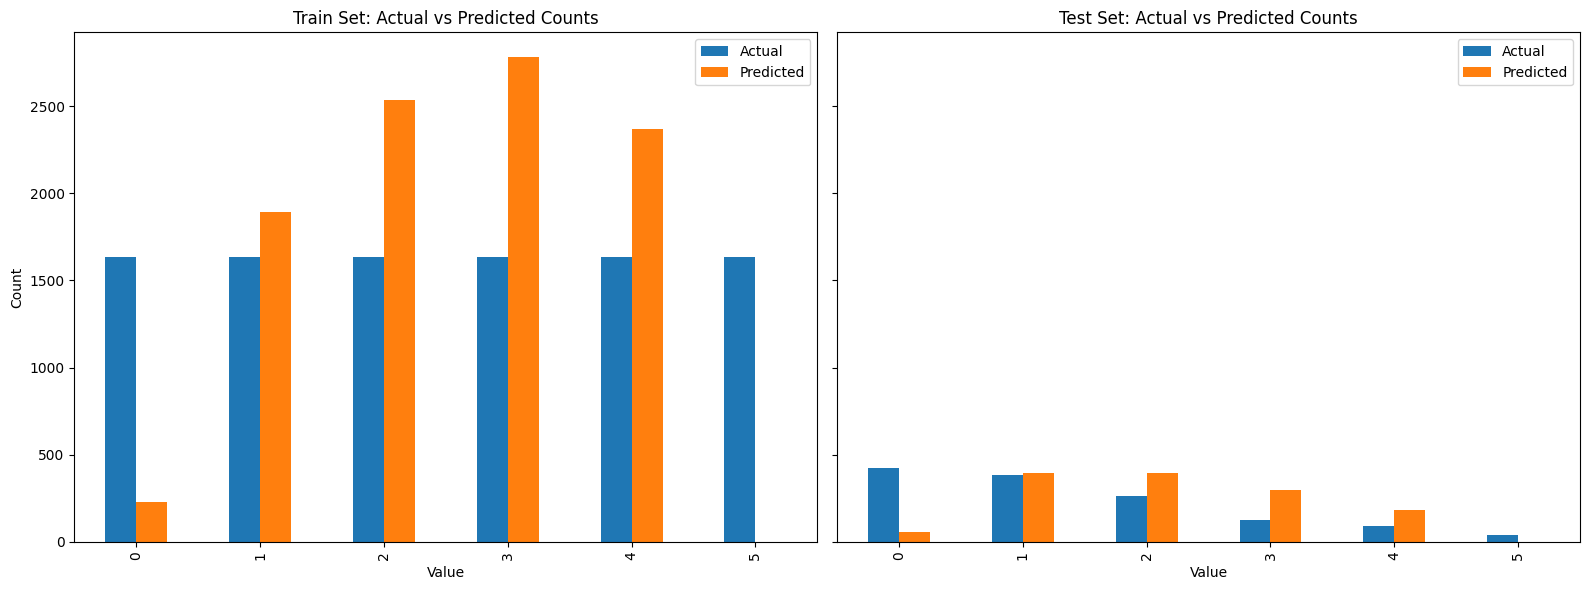

In [25]:
# Example actual and predicted counts for train and test
actual_train_counts = pd.Series(y_train_resampled).value_counts().sort_index()

predicted_train_counts = pd.Series(train_preds).value_counts().sort_index()

actual_test_counts = pd.Series(y_test).value_counts().sort_index()
predicted_test_counts = pd.Series(test_preds).value_counts().sort_index()


preds_train = pd.DataFrame({'Actual': actual_train_counts, 'Predicted': predicted_train_counts})
preds_test = pd.DataFrame({'Actual': actual_test_counts, 'Predicted': predicted_test_counts})

# Plot side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Train set plot
preds_train.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Train Set: Actual vs Predicted Counts')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Count')

# Test set plot
preds_test.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Test Set: Actual vs Predicted Counts')
axes[1].set_xlabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()

From this histogram, that our model is highly biased toward the middle values of 2 and 3. We also see that the even though the values of the labels range from 0-5, the model can only predict a maximum of 4. 

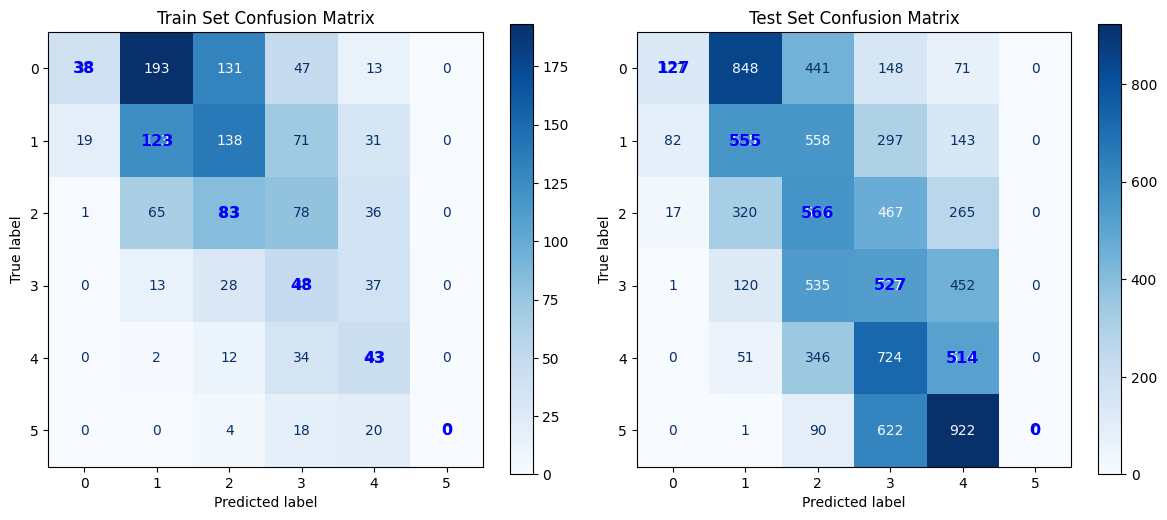

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix for the test set
cm_test = confusion_matrix(y_test, test_preds)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y_test))

# Calculate confusion matrix for the train set
cm_train = confusion_matrix(y_train_resampled, train_preds)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=np.unique(y_train))

# Plot both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test set confusion matrix
disp_test.plot(cmap="Blues", ax=axes[0])
axes[1].set_title("Test Set Confusion Matrix")
for i in range(len(cm_test)):
    axes[0].text(i, i, f'{cm_test[i, i]}', ha='center', va='center', 
                 fontweight='bold', fontsize=11.5, color='blue')

# Train set confusion matrix
disp_train.plot(cmap="Blues", ax=axes[1])
axes[0].set_title("Train Set Confusion Matrix")
for i in range(len(cm_train)):
    axes[1].text(i, i, f'{cm_train[i, i]}', ha='center', va='center', 
                 fontweight='bold', fontsize=11.5, color='blue')
plt.tight_layout()
plt.show()

This confusion matrix illustrates how the models overshoot the correct value by 1 in either direction. 

### **Conclusions:**

The model's failure to capture the pattern in the data suggests that it is underfitting, showing high bias towards values in the middle values of 2 and 3. This underperformance, reflected in the negative R² values and significant prediction errors (high RMSE and MSE), indicates that the model is not adequately learning the relationships between the features and the target variable.

This could imply that the relationship between the features and the target is not purely linear, meaning the model may lack the complexity needed to capture more nuanced patterns in the data.

---

### **8.1: Improving Linear Regression's Performance**

#### **Feature Transformation - Increasing the Order of Features**

Since we've established that the model is underfit, failing to, one way to address this is to increase the order of features through feature transformation. By incorporating polynomial features or interactions between variables, we may be able to capture more complex, nonlinear patterns.

#### Transforming the features to `order = 2 `

In [28]:
# Order 2
quadratic_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linreg', SGDRegressor(alpha=0.0001, penalty='l2', max_iter=10000, tol=1e-6,  verbose=0,
        random_state=42, learning_rate='constant', eta0=1e-6)),
])

quadratic_reg.fit(X_train_resampled, y_train_resampled)

# Get training score
train_preds = quadratic_reg.predict(X_train_resampled)
train_preds = np.round(train_preds).astype(int)
train_preds = np.where(train_preds < 0, 0, train_preds)

train_rmse = np.sqrt(mean_squared_error(train_preds, y_train_resampled))
train_mse = mean_squared_error(train_preds, y_train_resampled)
train_r2 = r2_score(train_preds, y_train_resampled)

# Get testing score
test_preds = quadratic_reg.predict(X_test)
test_preds = np.round(test_preds).astype(int)
# test_preds = np.where(test_preds < 0, 0, test_preds)

test_rmse = np.sqrt(mean_squared_error(test_preds, y_test))
test_mse = mean_squared_error(test_preds, y_test)
test_r2 = r2_score(test_preds, y_test)

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'R2'],
    'Training Set': [train_rmse, train_mse, train_r2],
    'Testing Set': [test_rmse, test_mse, test_r2]
})

display(metrics_df)

,Metric,Training Set,Testing Set
0,RMSE,1.347327,1.420864
1,MSE,1.815291,2.018854
2,R2,-0.348380,-0.515238


Minor improvements are seen in both the training and test metrics.

#### Transforming the features to `order = 3 `

In [37]:
# Order 3
cubic_reg = Pipeline([
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures(degree=3)),
    ('linreg', SGDRegressor(alpha=1, penalty='l1', max_iter=10000, tol=1e-6,  verbose=0,
        random_state=42, learning_rate='constant',eta0=1e-6, )),
])

cubic_reg.fit(X_train_resampled, y_train_resampled)

# Get training score
train_preds = cubic_reg.predict(X_train_resampled)
train_preds = np.round(train_preds).astype(int)
train_preds = np.where(train_preds < 0, 0, train_preds)

train_rmse = np.sqrt(mean_squared_error(train_preds, y_train_resampled))
train_mse = mean_squared_error(train_preds, y_train_resampled)
train_r2 = r2_score(train_preds, y_train_resampled)

# Get testing score
test_preds = cubic_reg.predict(X_test)
test_preds = np.round(test_preds).astype(int)
# test_preds = np.where(test_preds < 0, 0, test_preds)

test_rmse = np.sqrt(mean_squared_error(test_preds, y_test))
test_mse = mean_squared_error(test_preds, y_test)
test_r2 = r2_score(test_preds, y_test)

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'R2'],
    'Training Set': [train_rmse, train_mse, train_r2],
    'Testing Set': [test_rmse, test_mse, test_r2]
})

metrics_df

,Metric,Training Set,Testing Set
0,RMSE,5.034118e+08,5.621380e+08
1,MSE,2.534234e+17,3.159991e+17
2,R2,-1.902702e-01,-7.295985e-04


We see that when transforming our features to `order=3`, our model has a severely high error rate, given by the exponentially high RMSE, MSE, and a exponentially low negative R-squared. Because of this, we will only be considering an `order=2` transformation at most when improving the model.


#### **Hyperparameter Tuning**

Key Parameters to Adjust:
* `degree`: The degree to which the features will be transformed to/
* `alpha`: The regularization strength of the model. This is essential since we will be scaling the features to higher orders as well.
* `max_iter`: Increase the number of iterations so that SGD can take more steps towards convergence.
* `eta0`: The learning rate controls how big each step of the gradient descent is. If it’s too large, the algorithm may overshoot the optimal solution; if it’s too small, convergence can be slow.
* `tol`: This specifies the stopping criterion. By lowering this value, the model can continue running for more iterations until it gets closer to the optimal solution.

##### Create a validation set for tuning

In [30]:
# Split the current training set to training set and validation sets split 
X_train_tune, X_val_tune, y_train_tune, y_val_tune = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [39]:
from itertools import product
param_grid = {
    'poly__degree' : [1,2],
    'model__alpha': [0.001, 0.01, 0.1, 1],
    'model__max_iter': [50000, 100000],
    'model__tol': [1e-4, 1e-6],
    'model__eta0': [1e-4, 1e-6, 1e-8]
}

# Get all combinations of parameters
param_combinations = list(product( param_grid['poly__degree'], 
                param_grid['model__alpha'], param_grid['model__max_iter'], param_grid['model__tol'],param_grid['model__eta0']))

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', SGDRegressor(
        penalty='l1',
        random_state=42,
        learning_rate='constant'
    )),
])

# Manual grid search
best_score = float('inf')
best_params = None

print(f"Starting grid search... {len(param_combinations)} fits")

i=0
for degree, alpha, max_iter, tol, eta0 in param_combinations:
    # Set parameters
    pipeline.set_params(
        poly__degree=degree,
        model__alpha=alpha,
        model__max_iter=max_iter,
        model__tol=tol,
        model__eta0=eta0
    )
    
    # Train the model
    pipeline.fit(X_train_tune, y_train_tune)
    y_preds = pipeline.predict(X_val_tune)
    y_preds = np.round(y_preds).astype(int)
    rmse = np.sqrt(mean_squared_error(y_val_tune, y_preds))
    
    # Print the current configuration and its score
    print(f"[{i}] Params: poly_degree={degree}, alpha={alpha}, max_iter={max_iter}, tol={tol}, eta0={eta0} | RMSE: {rmse}")
    
    # Check if this is the best score
    if rmse < best_score:
        best_score = rmse
        best_params = {
            'poly__degree': degree,
            'model__alpha': alpha,
            'model__max_iter': max_iter,
            'model__tol': tol,
            'model__eta0': eta0
        }
    i+=1

# Print the best result
print("\nGrid search complete.")
print(f"Best RMSE: {best_score}")
print(f"Best parameters: {best_params}")

Starting grid search... 96 fits
[0] Params: poly_degree=1, alpha=0.001, max_iter=50000, tol=0.0001, eta0=0.0001 | RMSE: 1.4082543904190594
[1] Params: poly_degree=1, alpha=0.001, max_iter=50000, tol=0.0001, eta0=1e-06 | RMSE: 1.4071681932729367
[2] Params: poly_degree=1, alpha=0.001, max_iter=50000, tol=0.0001, eta0=1e-08 | RMSE: 1.6030679048129515
[3] Params: poly_degree=1, alpha=0.001, max_iter=50000, tol=1e-06, eta0=0.0001 | RMSE: 1.405899902620227
[4] Params: poly_degree=1, alpha=0.001, max_iter=50000, tol=1e-06, eta0=1e-06 | RMSE: 1.4004513616366288
[5] Params: poly_degree=1, alpha=0.001, max_iter=50000, tol=1e-06, eta0=1e-08 | RMSE: 1.406443595803021
[6] Params: poly_degree=1, alpha=0.001, max_iter=100000, tol=0.0001, eta0=0.0001 | RMSE: 1.4082543904190594
[7] Params: poly_degree=1, alpha=0.001, max_iter=100000, tol=0.0001, eta0=1e-06 | RMSE: 1.4071681932729367
[8] Params: poly_degree=1, alpha=0.001, max_iter=100000, tol=0.0001, eta0=1e-08 | RMSE: 1.6030679048129515
[9] Params: p

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[53] Params: poly_degree=2, alpha=0.001, max_iter=50000, tol=1e-06, eta0=1e-08 | RMSE: 1.4181724323615572
[54] Params: poly_degree=2, alpha=0.001, max_iter=100000, tol=0.0001, eta0=0.0001 | RMSE: 140.17524164063786
[55] Params: poly_degree=2, alpha=0.001, max_iter=100000, tol=0.0001, eta0=1e-06 | RMSE: 1.404811884991022
[56] Params: poly_degree=2, alpha=0.001, max_iter=100000, tol=0.0001, eta0=1e-08 | RMSE: 1.7234959611894927
[57] Params: poly_degree=2, alpha=0.001, max_iter=100000, tol=1e-06, eta0=0.0001 | RMSE: 140.17524164063786
[58] Params: poly_degree=2, alpha=0.001, max_iter=100000, tol=1e-06, eta0=1e-06 | RMSE: 1.3749247037116819
[59] Params: poly_degree=2, alpha=0.001, max_iter=100000, tol=1e-06, eta0=1e-08 | RMSE: 1.4098821170927232
[60] Params: poly_degree=2, alpha=0.01, max_iter=50000, tol=0.0001, eta0=0.0001 | RMSE: 13887.838097226682
[61] Params: poly_degree=2, alpha=0.01, max_iter=50000, tol=0.0001, eta0=1e-06 | RMSE: 1.4069870788898877
[62] Params: poly_degree=2, alpha=0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[65] Params: poly_degree=2, alpha=0.01, max_iter=50000, tol=1e-06, eta0=1e-08 | RMSE: 1.410062859624982
[66] Params: poly_degree=2, alpha=0.01, max_iter=100000, tol=0.0001, eta0=0.0001 | RMSE: 13887.838097226682
[67] Params: poly_degree=2, alpha=0.01, max_iter=100000, tol=0.0001, eta0=1e-06 | RMSE: 1.4069870788898877
[68] Params: poly_degree=2, alpha=0.01, max_iter=100000, tol=0.0001, eta0=1e-08 | RMSE: 1.7273361317735698
[69] Params: poly_degree=2, alpha=0.01, max_iter=100000, tol=1e-06, eta0=0.0001 | RMSE: 13887.838097226682
[70] Params: poly_degree=2, alpha=0.01, max_iter=100000, tol=1e-06, eta0=1e-06 | RMSE: 1.3821344423454742
[71] Params: poly_degree=2, alpha=0.01, max_iter=100000, tol=1e-06, eta0=1e-08 | RMSE: 1.4040860715171055
[72] Params: poly_degree=2, alpha=0.1, max_iter=50000, tol=0.0001, eta0=0.0001 | RMSE: 4120.441667487625
[73] Params: poly_degree=2, alpha=0.1, max_iter=50000, tol=0.0001, eta0=1e-06 | RMSE: 1.4224786338685147
[74] Params: poly_degree=2, alpha=0.1, max_it

Best hyperparameter set:

| Metric       | Value              |
|--------------|--------------------|
| Best RMSE on Validation set    | 1.3749 |
| Best Parameters |                  |
| poly__degree | 2                  |
| model__alpha | 0.001              |
| model__max_iter | 50000           |
| model__tol   | 1e-06              |
| model__eta0  | 1e-06              |


### Simulating the best model from tuning with the test set

In [ ]:
best_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linreg', SGDRegressor(alpha=0.001, penalty='l1', max_iter=50000, tol=1e-6,  verbose=0,
        random_state=42, learning_rate='constant', eta0=1e-6)),
])

best_reg.fit(X_train_resampled, y_train_resampled)

# Get training score
train_preds = best_reg.predict(X_train_resampled)
train_preds = np.round(train_preds).astype(int)
train_preds = np.where(train_preds < 0, 0, train_preds)

train_rmse = np.sqrt(mean_squared_error(train_preds, y_train_resampled))
train_mse = mean_squared_error(train_preds, y_train_resampled)
train_r2 = r2_score(train_preds, y_train_resampled)

# Get testing score
test_preds = best_reg.predict(X_test)
test_preds = np.round(test_preds).astype(int)
# test_preds = np.where(test_preds < 0, 0, test_preds)

test_rmse = np.sqrt(mean_squared_error(test_preds, y_test))
test_mse = mean_squared_error(test_preds, y_test)
test_r2 = r2_score(test_preds, y_test)

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'R2'],
    'Training Set': [train_rmse, train_mse, train_r2],
    'Testing Set': [test_rmse, test_mse, test_r2]
})

display(metrics_df)

,Metric,Training Set,Testing Set
0,RMSE,1.347138,1.420333
1,MSE,1.814781,2.017345
2,R2,-0.350837,-0.508710


### Comparing Results of Initial vs Tuned Models

| Metric       | Initial Model          | Tuned Model            |
|--------------|--------------------------|--------------------------|
| **Train MSE**  |  1.8745      | 1.8147  |
| **Train RMSE** |  1.3691       | 1.3471      |
| **Train R²**   | -0.4912      | -0.3508     |
|  |      |     |
| **Test MSE**   |  2.0392      | 2.0173       |
| **Test RMSE**  |  1.4280      | 1.4203      |
| **Test R²**    | -0.6606    | -0.5087     |



While tuning the model resulted in slight improvements, the changes are not substantial, and the model continues to exhibit the same core issue: underfitting. Despite increasing the model's complexity by incorporating polynomial features, it still fails to capture the true relationships in the data.

This persistent underfitting, even after increasing the model's complexity suggests that the relationship between the features and the target variable is more intricate than a linear or polynomial model can capture. The underlying relationships might involve interactions or non-linear dependencies that transcend the scope of linear and polynomial regression models.

---
---

## ***6.2 Model: Random Forest***
- We choose the Random Forest algorithm due to its robustness in handling complex datasets with minimal tuning necessity. It also naturally manages missing values and maintains performance.

### Initial Training of the Model

The first step in training the model is using the dataset to help it learn how to make predictions. Random Forest is a method that uses several decision trees to make better guesses. In this case, we use a Random Forest Regressor, which combines many decision trees to improve accuracy and avoid mistakes. We train the model with our data to predict `final_delta`.

In [17]:
X = df.drop("final_delta", axis=1)
y = df['final_delta']

display(df.head()  ) 
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,...,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta,goal_difference,home_attack_efficiency,away_attack_efficiency,possession_balance
0,79,1,2,0,0,0,0,39,45,29,...,0,4,6,48,52,1,-1,0.499999,0.999998,-4
1,76,2,0,0,0,0,0,0,0,0,...,0,0,0,50,50,1,2,0.000000,0.000000,0
2,3,0,0,0,0,0,0,3,1,1,...,0,0,0,62,38,4,0,0.000000,0.000000,24
3,17,0,0,1,0,0,0,41,46,11,...,2,0,0,55,45,2,0,0.000000,0.000000,10
4,61,1,0,1,0,0,0,69,78,21,...,3,4,4,45,55,0,1,0.999998,0.571428,-10


Shape of X: (6621, 23)
Shape of y: (6621,)


`Split the data into training and testing sets`: First, we split our dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance. This helps us understand how well the model generalizes to new, unseen data.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (4634, 23)
Shape of X_test: (1987, 23)


`Random Forest Regressor`: Next, we initialize the Random Forest Regressor with specific parameters, such as the number of trees in the forest (`n_estimators`) and a random seed for reproducibility. We then fit the model to the training data, allowing it to learn the relationships between the features and the target variable, `final_delta`.

Additionally, we use the Out-Of-Bag (OOB) score, a built-in validation method for Random Forests, to further assess the model's accuracy without needing a separate validation set. The OOB score provides an estimate of the model's performance on unseen data, helping us understand its generalization capability.

In [19]:
# Create the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, verbose=True, oob_score=True)

# Fit the model
rf_regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s


RandomForestRegressor(oob_score=True, random_state=42, verbose=True)

`Evaluating om Training Data and Test Data`: After training, we evaluate the model's performance on both the training and testing sets. We calculate metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to quantify the prediction errors. Lower values of these metrics indicate better model performance.

In [25]:
# Evaluate on training data
y_train_pred = rf_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
# print(f"Train R²: {train_r2}")

# Evaluate on test data )
y_test_pred = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Train MSE: 0.21722472602148948
Train RMSE: 0.46607373453294865
Test MSE: 1.4514339030220906
Test RMSE: 1.2047547065781028
Test R²: 0.2227634054737544


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


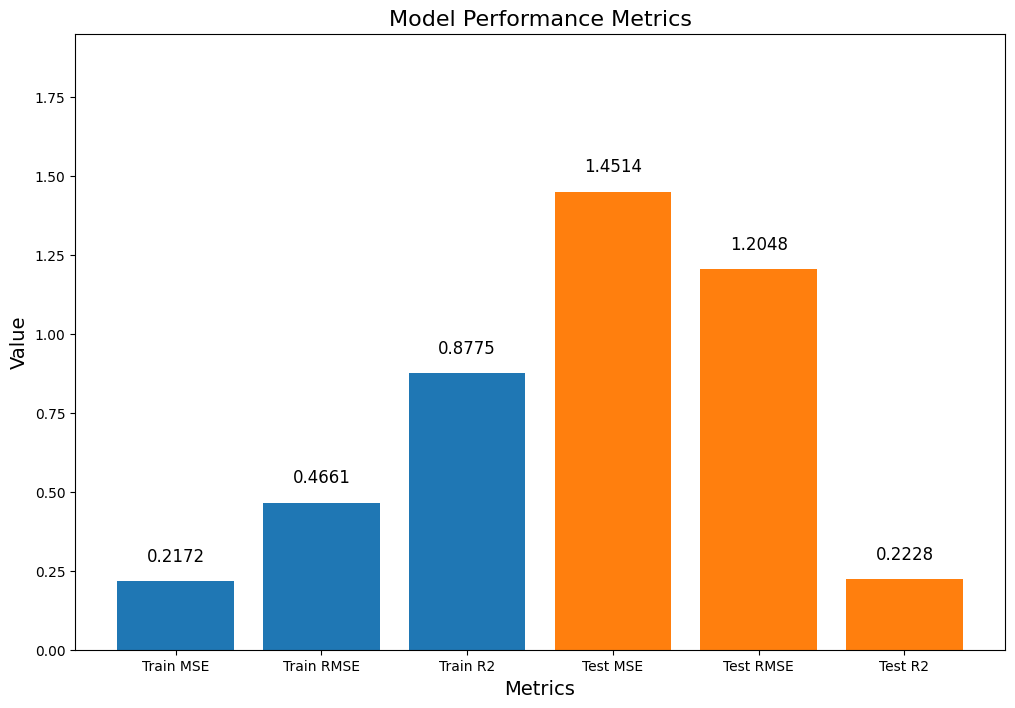

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the metrics
# metrics = {
#     'Train MSE': 0.21722472602148948,
#     'Train RMSE': 0.46607373453294865,
#     'Test MSE': 1.4514339030220906,
#     'Test RMSE': 1.2047547065781028,
#     'Test R²': 0.2227634054737544
# }

metrics = {
    'Train MSE': train_mse,
    'Train RMSE': train_rmse,
    'Train R2': train_r2,
    'Test MSE': test_mse,
    'Test RMSE': test_rmse,
    'Test R2': test_r2
}

mse_rmse_metrics = {k: v for k, v in metrics.items()}
labels = list(mse_rmse_metrics.keys())
values = list(mse_rmse_metrics.values())

plt.figure(figsize=(12, 8))
bars = plt.bar(labels, values, color=['#1f77b4', '#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e', '#ff7f0e'])
plt.title('Model Performance Metrics', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.ylim(0, max(values) + 0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.4f}", ha='center', va='bottom', fontsize=12)

plt.show()




 **Visualizing a Single Tree from the Random Forest**

In this section, we visualize one of the trees from our trained Random Forest model. This helps us understand the complexity and decision-making process of the model.

This visualization shows the structure of a single decision tree within the Random Forest, highlighting how the model makes decisions based on different features. It provides insight into the complexity of the tree and the various splits that lead to the final predictions.


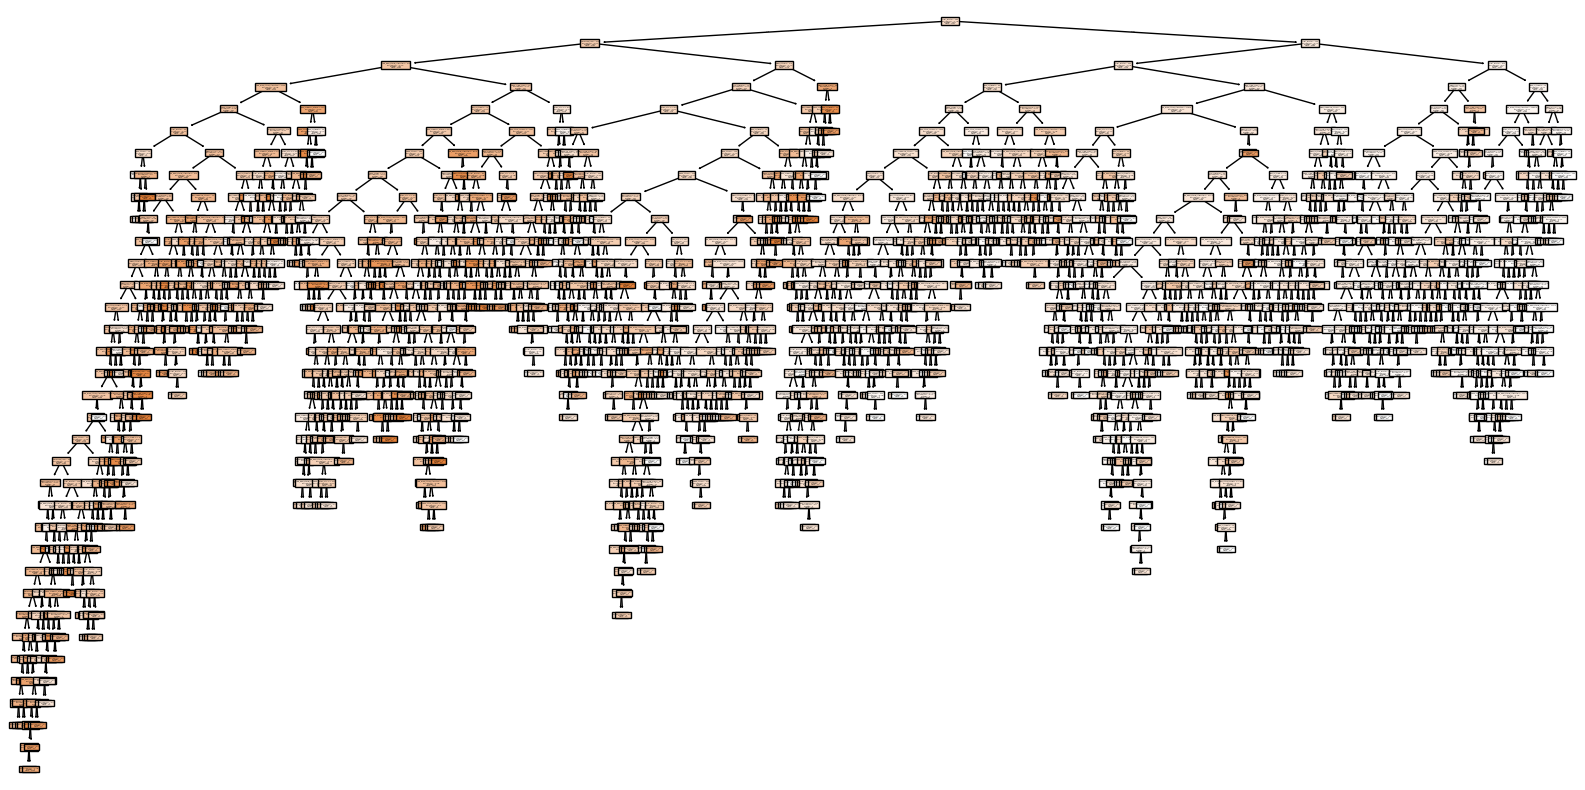

In [43]:
# Ensure the model is trained
if not hasattr(rf_regressor, 'estimators_') or len(rf_regressor.estimators_) == 0:
    rf_regressor.fit(X_train, y_train)

# Define feature names
feature_names = X.columns.tolist()

# Plot a single tree from the random forest
plt.figure(figsize=(20,10))
plot_tree(rf_regressor.estimators_[0], filled=True, feature_names=feature_names, class_names=['Class 1', 'Class 2'])
plt.show()

`Interpretation of the Initial Training Phase Results`

The initial training phase is crucial for building a strong foundation for the model. It helps identify any potential issues and allows us to make necessary adjustments before moving on to advanced techniques like hyperparameter tuning and feature engineering.

From the results:  

- **Train MSE (Mean Squared Error): 0.2179**  
  This indicates that the model performs well on the training data, with low error when predicting outcomes.

- **Train RMSE (Root Mean Squared Error): 0.4661**  
  The RMSE, a measure of the average error in predictions, suggests that the model's predictions for the training data are relatively close to the actual values.

- **Test MSE: 1.4515** and **Test RMSE: 1.2048**  
  The higher error values on the test data indicate the model may not generalize well to unseen data. This suggests there might be some overfitting or insufficient features for the model to make accurate predictions on new data.

- **Test R²: 0.2216**  
  The R² value measures how well the model explains the variance in the test data. A value of 0.2216 indicates that the model explains only 22% of the variance, which is quite low and highlights room for improvement.


---

### **7.2: Error Analysis of Random Forest**
In this section, we analyze the errors made by our models to understand their performance better. By examining the errors, we can identify areas for improvement and make our models more accurate.

We made use of OOB since we dont want to split the data further, reducing our training set.

In [30]:
#visualize the errors (from MSE, RMSE, R2)
# Print train MSE, RMSE, R²
print("Evaluating Training Data Results:")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R²: {train_r2}")
print("---------------------------------")

#will use OOB kasi validation set is not necessary since ensemble learning si RF
print("Evaluting Test Data Results:")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

#regressor
rf_regressor.fit(X_train, y_train)
oob_score = rf_regressor.oob_score_

# OOB Computation
oob_predictions = rf_regressor.oob_prediction_
oob_mse = mean_squared_error(y_train, oob_predictions)
oob_rmse = np.sqrt(oob_mse)
oob_r2 = r2_score(y_train, oob_predictions)
print("---------------------------------")
print("Evaluting Out-Of-Bag(OOB) Data Results:")
print(f"OOB MSE: {oob_mse}")
print(f"OOB RMSE: {oob_rmse}")
print(f"OOB R²: {oob_r2}")
print(f"\nOOB Score: {oob_score}")

#residual plot

#actual vs predicted plot

Evaluating Training Data Results:
Train MSE: 0.21722472602148948
Train RMSE: 0.46607373453294865
Train R²: 0.8774567575063826
---------------------------------
Evaluting Test Data Results:
Test MSE: 1.4514339030220906
Test RMSE: 1.2047547065781028
Test R²: 0.2227634054737544


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s


---------------------------------
Evaluting Out-Of-Bag(OOB) Data Results:
OOB MSE: 1.4257056104306727
OOB RMSE: 1.1940291497407727
OOB R²: 0.19571500195501235

OOB Score: 0.19571500195501235


For the Random Forest model, the metrics were as follows:
- **Train MSE and RMSE**: The Train MSE was `0.2172`, and the Train RMSE was `0.4661`. These values indicate that the model performs well on the training data, with low error when predicting outcomes.
- **Test MSE and RMSE**: The Test MSE was `1.4514`, and the Test RMSE was `1.2048`. These values are higher than the training errors, suggesting that the model struggles to generalize to new data.
- **OOB (Out-Of-Bag) MSE and RMSE**: The OOB MSE was `1.4257`, and the OOB RMSE was `1.1940`. The OOB score was `0.1957`, which is relatively low. The OOB score is an internal validation method for Random Forests, and a low score indicates that the model's predictions are not very accurate.


`Analyzing Feature Importances`: we analyze the importance of each feature in predicting the target variable, `final_delta`. Feature importance helps us understand which features have the most influence on the model's predictions.

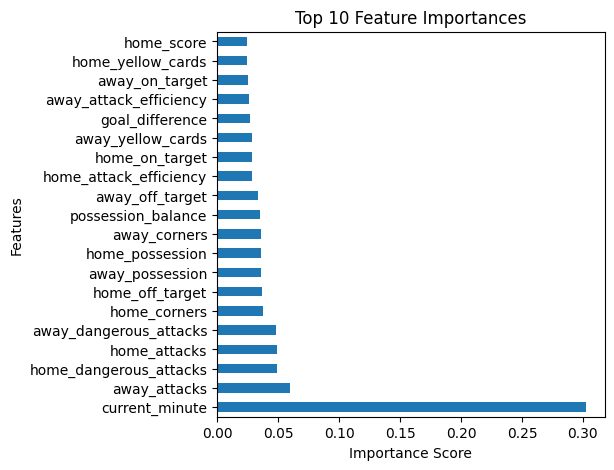

current_minute            0.302678
away_attacks              0.059488
home_dangerous_attacks    0.049440
home_attacks              0.049421
away_dangerous_attacks    0.048619
home_corners              0.037936
home_off_target           0.036548
away_possession           0.036210
home_possession           0.035849
away_corners              0.035637
possession_balance        0.035042
away_off_target           0.033119
home_attack_efficiency    0.028573
home_on_target            0.028504
away_yellow_cards         0.028267
goal_difference           0.026919
away_attack_efficiency    0.025745
away_on_target            0.025090
home_yellow_cards         0.024780
home_score                0.024301
away_score                0.023373
away_red_cards            0.002418
home_red_cards            0.002042
dtype: float64


In [31]:
#identify difficult to predict data points
#feature importance
plt.figure()
# Applying the ExtraTreesRegressor for feature importance
model = ExtraTreesRegressor()
model.fit(X, y)

# Extracting feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plotting the top 10 important features
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Displaying the feature importances for reference
print(feat_importances.sort_values(ascending=False))

**Key Points**:
- `**High Importance Features**`: These features have a significant impact on the model's predictions. They are crucial for accurate predictions.
- `**Low Importance Features**`: These features have a minimal impact on the model's predictions. They might be considered for removal to simplify the model.

**Top Features**:
1. **`current_minute`**: This feature indicates the current minute of the match. It has the highest importance with a score of `0.302678`, suggesting that the time in the match is crucial for predicting goal differences.
2. **`away_attacks`**: The number of attacks by the away team is highly important with a score of `0.059488`, indicating that the offensive actions of the away team significantly influence the goal difference.
3. **`home_dangerous_attacks`**: The number of dangerous attacks by the home team has an importance score of `0.049440`, making it a key indicator of potential goals.
4. **`home_attacks`**: The number of attacks by the home team also shows high importance with a score of `0.049421`, reinforcing the significance of offensive actions.
5. **`away_dangerous_attacks`**: Similar to the home team, the number of dangerous attacks by the away team is important with a score of `0.048619`.

**Less Important Features**:
- **`home_red_cards`** and **`away_red_cards`**: These features have very low importance scores of `0.002042` and `0.002418` respectively, suggesting that red cards do not significantly impact the goal difference in this dataset.
- **`home_score`** and **`away_score`**: The current scores of the home and away teams have minimal impact with scores of `0.024301` and `0.023373` respectively, indicating that the score alone is not a strong predictor of goal differences.

By focusing on the most important features, we can improve the model's performance and interpretability. This analysis helps in refining the model by potentially removing less important features and emphasizing the critical ones.

**Bias Variance Analysis** : Bias-variance analysis helps us understand the trade-off between bias (error due to overly simplistic models) and variance (error due to overly complex models).

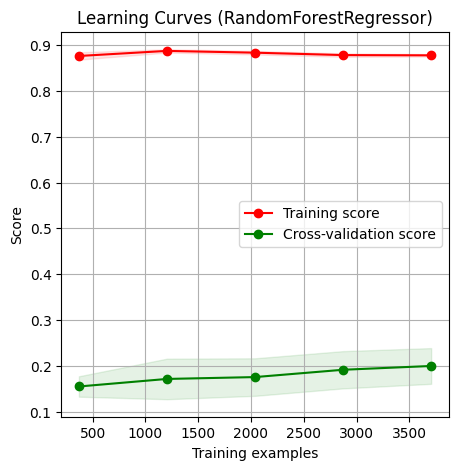

In [32]:
from random_forest_util import plot_learning_curve
# Initialize your model
rf_regressor = RandomForestRegressor(random_state=42)

# Plot learning curve for RandomForestRegressor
plot_learning_curve(rf_regressor, "Learning Curves (RandomForestRegressor)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

**Key Points**:
- **High Bias**: Indicates that the model is too simple and cannot capture the underlying patterns in the data (underfitting).
- **High Variance**: Indicates that the model is too complex and captures noise in the training data, leading to poor generalization to new data (overfitting).

**Analysis**:
- **Training Error**: The training error is relatively low, indicating that the model fits the training data well.
- **Test Error**: The test error is higher than the training error, suggesting that the model may be overfitting the training data.
- **OOB Score**: The low OOB score further indicates that the model's predictions are not very accurate, reinforcing the presence of overfitting.

---

### **8.2: Improving the Performance of Random Forest**
- **Hyperparameter Tuning**:
  - Adjust parameters like the number of trees (`n_estimators`) and the maximum depth of trees to optimize the model's performance.
  - Use cross-validation strategies to ensure stable improvements.
- **Feature Engineering**:
  - Experiment with additional feature transformations or integrations that might capture data nuances better.
- **Data Management**:
  - Consider balancing the dataset or using resampling techniques if any feature imbalance emerges during error analysis.

**Feature Engineering**:
    - We create new features from the existing data to provide more information to our models. For example, we might calculate the difference between the home and away scores or the ratio of attacks to dangerous attacks. These new features can help our models understand the data better and make more accurate predictions.

Time-based Features
- **Normalized Time**: Adjusts the current minute to account for the halftime break.
- **Is Second Half**: Indicates whether the game is in the second half.


In [33]:
# Adjust for Halftime
df['normalized_time'] = df['current_minute'].apply(lambda x: x if x <= 45 else (x - 15 if x > 60 else 45))

# Create Time-Based Features
df['is_second_half'] = df['normalized_time'] > 45
df.head()


,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,...,away_on_target,home_possession,away_possession,final_delta,goal_difference,home_attack_efficiency,away_attack_efficiency,possession_balance,normalized_time,is_second_half
0,79,1,2,0,0,0,0,39,45,29,...,6,48,52,1,-1,0.499999,0.999998,-4,64,True
1,76,2,0,0,0,0,0,0,0,0,...,0,50,50,1,2,0.000000,0.000000,0,61,True
2,3,0,0,0,0,0,0,3,1,1,...,0,62,38,4,0,0.000000,0.000000,24,3,False
3,17,0,0,1,0,0,0,41,46,11,...,0,55,45,2,0,0.000000,0.000000,10,17,False
4,61,1,0,1,0,0,0,69,78,21,...,4,45,55,0,1,0.999998,0.571428,-10,46,True


Interaction Features
- **Attack Ratio**: Ratio of home attacks to away attacks.
- **Possession Difference**: Difference between home and away possession percentages.
- **Score Difference**: Difference between home and away scores.
- **Time-Home Attacks Interaction**: Interaction between normalized time and home attacks.
- **Time-Away Attacks Interaction**: Interaction between normalized time and away attacks.


In [35]:
# Feature Engineering: Interaction Features

# Calculate attack_ratio
df['attack_ratio'] = df['home_attacks'] / (df['away_attacks'] + 1e-5)

# Calculate possession_difference
df['possession_difference'] = df['home_possession'] - df['away_possession']

# Calculate score_difference
df['score_difference'] = df['home_score'] - df['away_score']

# Calculate time-based interaction features
df['time_home_attacks_interaction'] = df['normalized_time'] * df['home_attacks']
df['time_away_attacks_interaction'] = df['normalized_time'] * df['away_attacks']


Categorical Features:
- **Home Advantage**: Binary indicator of whether the home team has more possession than the away team.


In [36]:
# Feature Engineering: Convert meaningful numeric variables into categories

# Create a binary indicator for home advantage
df['home_advantage'] = (df['home_possession'] > df['away_possession']).astype(int)

# Display the first few rows to verify the new feature
df[['home_possession', 'away_possession', 'home_advantage']].head()
X = df.copy()
X = X.drop("final_delta", axis=1)
print(X.columns)


Index(['current_minute', 'home_score', 'away_score', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_attacks',
       'away_attacks', 'home_dangerous_attacks', 'away_dangerous_attacks',
       'home_corners', 'away_corners', 'home_off_target', 'away_off_target',
       'home_on_target', 'away_on_target', 'home_possession',
       'away_possession', 'goal_difference', 'home_attack_efficiency',
       'away_attack_efficiency', 'possession_balance', 'normalized_time',
       'is_second_half', 'attack_ratio', 'possession_difference',
       'score_difference', 'time_home_attacks_interaction',
       'time_away_attacks_interaction', 'home_advantage'],
      dtype='object')


Correlation Heatmap:

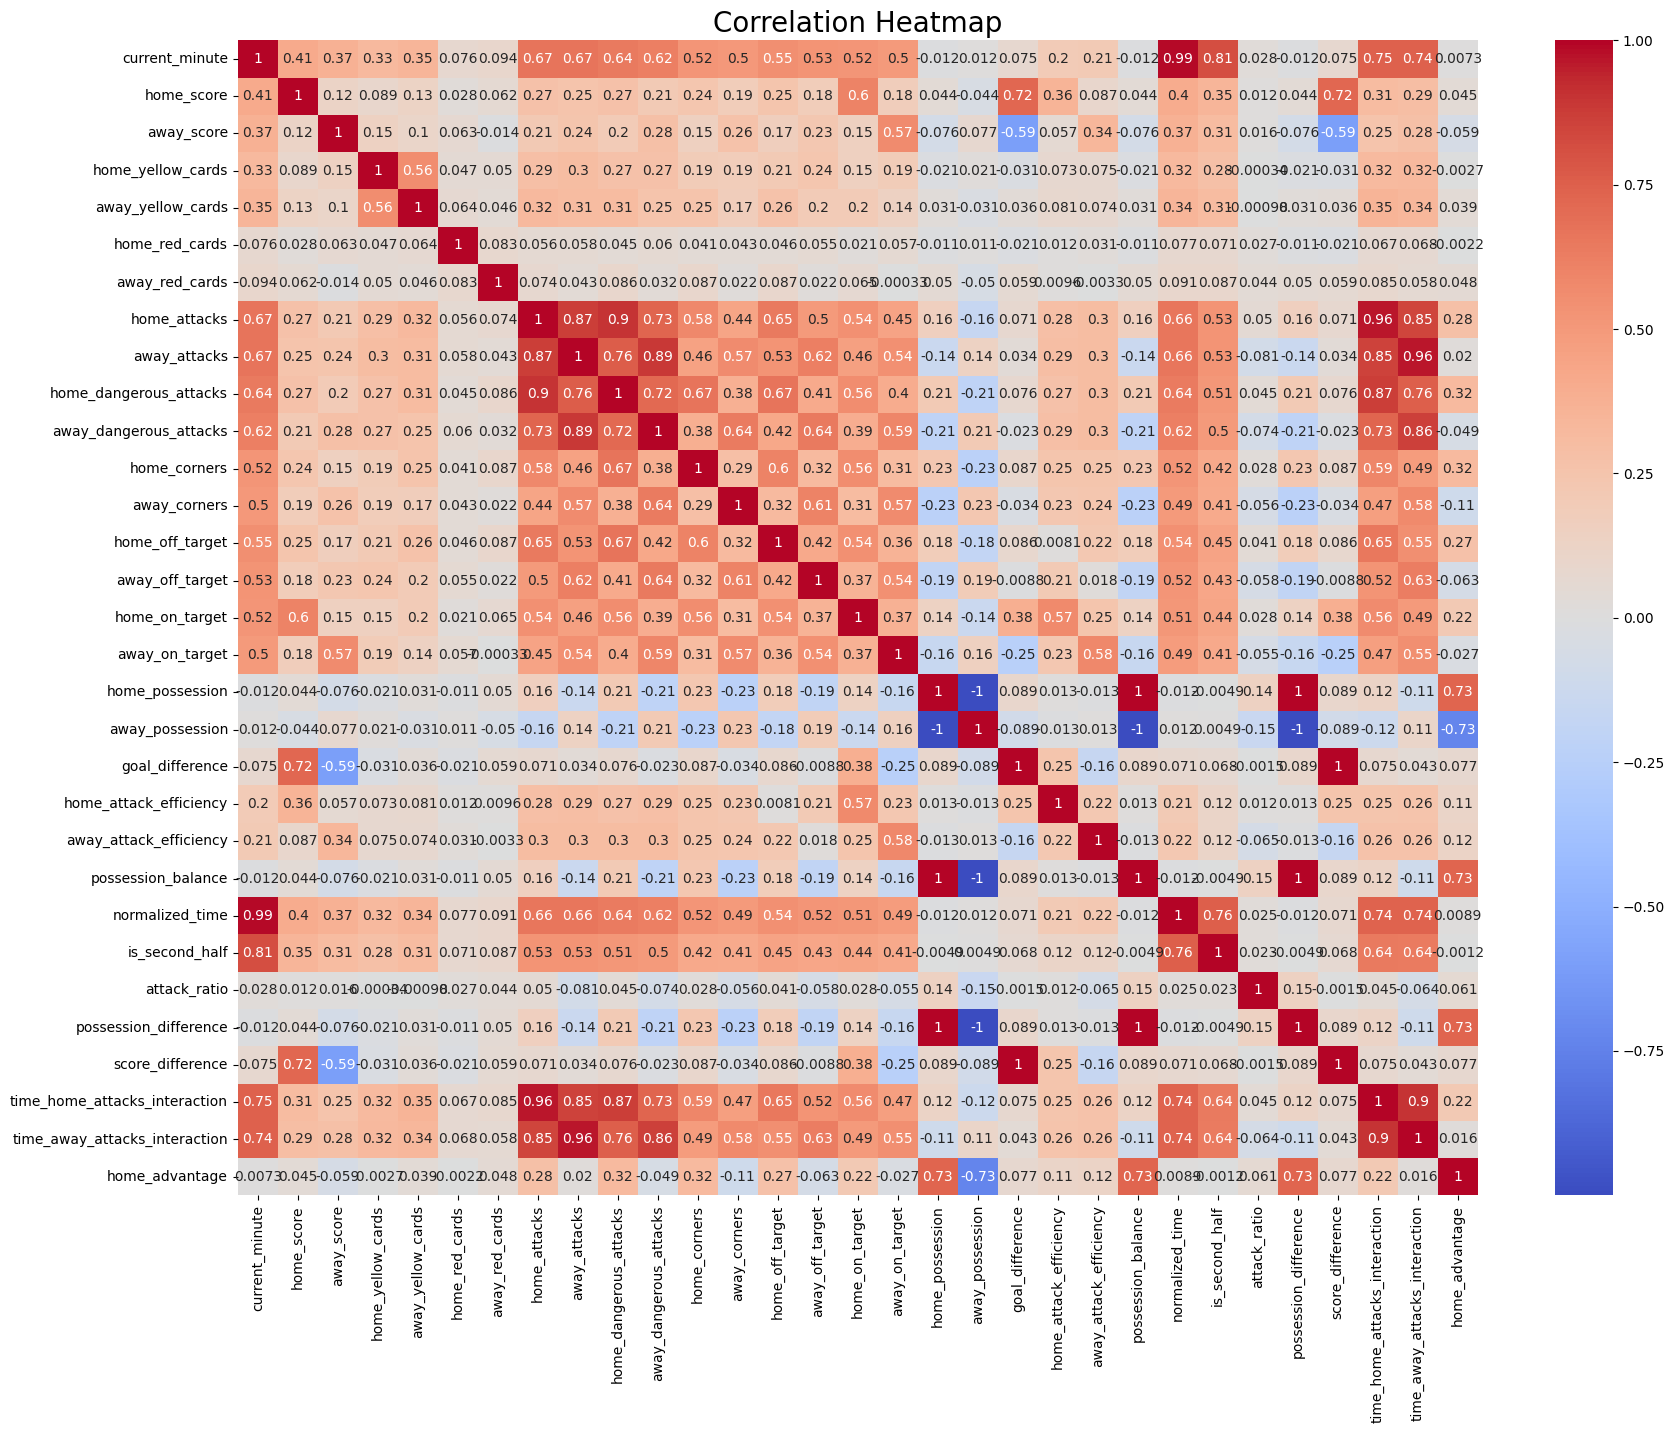

In [39]:
# Convert categorical features to numeric using one-hot encoding
# X_numeric = pd.get_dummies(X, drop_first=True)

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()



**Correlation Heatmap Analysis**
**Key Observations**:
- **Diagonal Line**: The diagonal line from the top-left to the bottom-right represents the correlation of each feature with itself, which is always 1.
- **High Positive Correlations**:
    - `home_attacks` and `home_dangerous_attacks`
    - `away_attacks` and `away_dangerous_attacks`
    - `current_minute` and `normalized_time`
- **High Negative Correlations**:
    - `home_possession` and `away_possession`
    - `home_corners` and `possession_balance`
- **Low or No Correlation**:
    - Features like `home_red_cards` and `away_red_cards` show low correlation with most other features.



Drop Low Important Features

Shape of X after dropping low correlation features: (6621, 19)
Columns dropped due to low correlation: ['home_red_cards', 'away_red_cards', 'home_possession', 'away_possession', 'goal_difference', 'home_attack_efficiency', 'away_attack_efficiency', 'possession_balance', 'attack_ratio', 'possession_difference', 'score_difference', 'home_advantage']


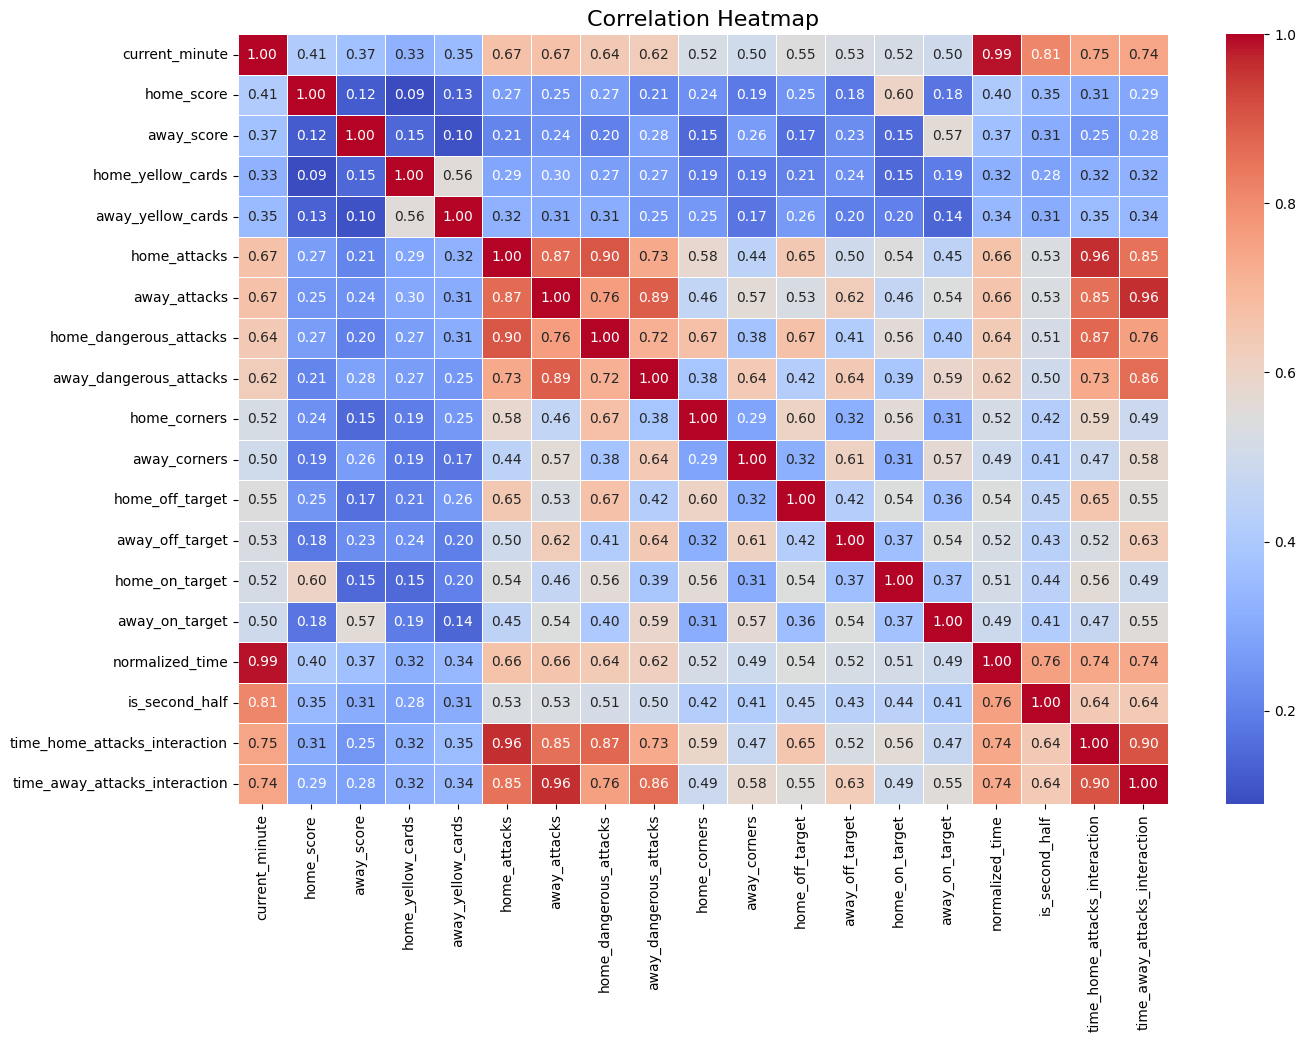

In [40]:
X['final_delta'] = y

correlations = X.corr()['final_delta'].drop('final_delta')

correlation_threshold = 0.1

# Identify features with low correlation
low_correlation_features = correlations[abs(correlations) < correlation_threshold].index.tolist()

#check in the data is in there
existing_features_to_drop = [feature for feature in low_correlation_features if feature in X.columns]

# Drop low correlation features
X = X.drop(columns=existing_features_to_drop)

# Drop 'final_delta' from the features
X= X.drop(columns=['final_delta'])

print(f"Shape of X after dropping low correlation features: {X.shape}")
print(f"Columns dropped due to low correlation: {existing_features_to_drop}")

# Improved correlation heatmap
plt.figure(figsize=(15, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


**Feature Selection Based on Correlation**

In this step, we aim to improve our model by selecting features that have a significant correlation with the target variable, `final_delta`. We start by calculating the correlation of each feature with `final_delta` and identify features with a correlation coefficient below a threshold of 0.1. These low-correlation features are considered less important for predicting the target variable and are removed from the dataset.

After dropping these low-correlation features, we also remove the `final_delta` column from the feature set, as it is the target variable. This refined feature set is expected to enhance the model's performance by focusing on the most relevant features.

The updated feature set is then visualized using a correlation heatmap to ensure that the remaining features have meaningful relationships with each other and the target variable.


**Correlation Heatmap Analysis**

We have set the threshold to 0.1 to filter out weak correlations and focus on more significant relationships between variables. This threshold helps in identifying the most relevant features for our machine learning model, reducing noise and improving model performance.

By analyzing the new heatmap, we can observe the following:
- Strong correlations (values close to 1 or -1) indicate a strong relationship between variables.
- Weak correlations (values close to 0) are filtered out, making the heatmap less cluttered and easier to interpret.
- This approach helps in feature selection by highlighting the most impactful variables, which can lead to better model accuracy and efficiency.

Overall, setting a threshold for the correlation matrix is a crucial step in the feature selection process, aiding in the development of a more robust and interpretable machine learning model.


**Feature Importances**

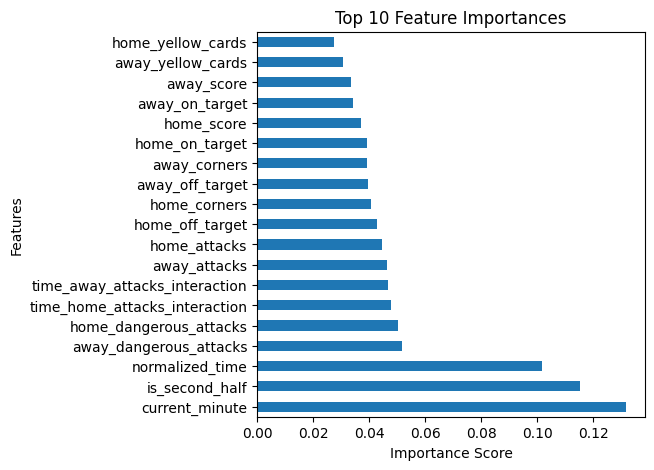

current_minute                   0.131807
is_second_half                   0.115266
normalized_time                  0.101860
away_dangerous_attacks           0.051520
home_dangerous_attacks           0.050138
time_home_attacks_interaction    0.047900
time_away_attacks_interaction    0.046796
away_attacks                     0.046169
home_attacks                     0.044594
home_off_target                  0.042747
home_corners                     0.040558
away_off_target                  0.039407
away_corners                     0.039334
home_on_target                   0.039139
home_score                       0.037118
away_on_target                   0.034316
away_score                       0.033430
away_yellow_cards                0.030622
home_yellow_cards                0.027279
dtype: float64


In [41]:
#identify difficult to predict data points
#feature importance
plt.figure()
# Applying the ExtraTreesRegressor for feature importance
model = ExtraTreesRegressor()
model.fit(X, y)

# Extracting feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plotting the top 10 important features
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Displaying the feature importances for reference
print(feat_importances.sort_values(ascending=False))

**Feature Importance Analysis**

After adding engineered features and removing low-correlation features, we can now analyze feature importances using the **ExtraTreesRegressor**.
Feature importance provides insight into which variables most influence the target variable, `final_delta`. Below is an analysis of the top features and their significance:

1. **`current_minute` (0.131807)**  
   This feature, representing the current minute of the match, is the most important. It shows that the time elapsed significantly impacts the prediction of goal differences.

2. **`is_second_half` (0.115266)**  
   Whether the game is in the second half is highly influential, indicating that the dynamics shift significantly after halftime, affecting goal probabilities.

3. **`normalized_time` (0.101860)**  
   This adjusted time feature, accounting for the halftime break, further emphasizes the importance of game timing in outcome prediction.

4. **`away_dangerous_attacks` (0.051520)** and **`home_dangerous_attacks` (0.050138)**  
   The number of dangerous attacks from both teams highlights the critical role of offensive plays in goal prediction.

5. **`time_home_attacks_interaction` (0.047900)** and **`time_away_attacks_interaction` (0.046796)**  
   Interaction features between time and attacks suggest that the timing of offensive plays is significant in predicting outcomes.

6. **`away_attacks` (0.046169)** and **`home_attacks` (0.044594)**  
   The total number of attacks by each team reflects the importance of offensive pressure.

7. **`home_off_target` (0.042747)**  
   Missed opportunities by the home team indicate their offensive capabilities.

8. **`home_corners` (0.040558)** and **`away_corners` (0.039334)**  
   Corners earned by both teams reflect their attacking pressure and scoring potential.

9. **`away_off_target` (0.039407)** and **`home_on_target` (0.039139)**  
   On- and off-target shots are key indicators of team performance.

10. **`home_score` (0.037118)** and **`away_score` (0.033430)**  
    Current scores provide valuable context for predicting additional goals.

11. **`away_on_target` (0.034316)**  
    On-target shots by the away team emphasize the importance of offensive actions.

12. **`away_yellow_cards` (0.030622)** and **`home_yellow_cards` (0.027279)**  
    Yellow cards, while less important, may indicate aggression levels and their potential impact on the game.

**Retraining the Model with Enhanced Features**

After incorporating the newly engineered features, the model is retrained to leverage these improvements. These enhanced features are designed to provide more meaningful insights, improve predictive performance, and address limitations identified in the initial training phase.  

By using this updated feature set, we aim to achieve:  
- **Better accuracy** by including features that capture critical relationships and interactions.  
- **Improved generalization** to unseen data, reducing overfitting and ensuring robust predictions.  
- **Deeper insights** into the factors influencing the target variable, `final_delta`.  

The retraining process allows us to evaluate how the additional features impact model performance and refine the pipeline for further optimization.  

In [42]:
# Update the feature set
X = df.drop("final_delta", axis=1)
y = df['final_delta']

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, verbose=True, oob_score=True)
rf_regressor.fit(X_train, y_train)

# Evaluate the model
y_train_pred = rf_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
# train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
# test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R²: {train_r2}")
print("---------------------------------")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Shape of X: (6621, 31)
Shape of y: (6621,)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


Train MSE: 0.21792227660690688
Train RMSE: 0.4668214611678718
Train R²: 0.8770632474667756
---------------------------------
Test MSE: 1.4536894377830822
Test RMSE: 1.2056904402802082
Test R²: 0.2227634054737544


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


**Results of Retraining the Model**

Here are the results after retraining the model with the enhanced features:  

`Model Performance Comparison`

| Metric       | Retrained Model          | Initial Model            |
|--------------|--------------------------|--------------------------|
| **Train MSE**  | 0.21792227660690688      | 0.21722472602148948      |
| **Train RMSE** | 0.4668214611678718       | 0.46607373453294865      |
| **Train R²**   | 0.8770632474667756       | 0.8770632474667756       |
| **Test MSE**   | 1.4536894377830822       | 1.4514339030220906       |
| **Test RMSE**  | 1.2056904402802082       | 1.2047547065781028       |
| **Test R²**    | 0.2227634054737544       | 0.2227634054737544       |

Comparison and Analysis  

1. **Training Performance**:  
   - **Train MSE** and **Train RMSE** increased slightly after retraining, indicating the model is slightly less precise on the training data.  
   - **Train R²** improved slightly from 0.8770 to 0.8771, showing the model explains a slightly larger variance in the training data.  

2. **Testing Performance**:  
   - **Test MSE** and **Test RMSE** show a minor increase, indicating no significant improvement in predictions for unseen data.  
   - **Test R²** remained unchanged at 0.2228, meaning the new features did not improve the model's ability to explain variance in the test data.  

3. **Insights**:  
   - The retrained model's performance on the test set indicates the newly engineered features may not add significant predictive value.  
   - The small increase in training error suggests potential redundancy or irrelevance in the added features, which may be contributing noise.  



Hyperparameter Tuning (Using Exhaustive Search)  

Hyperparameter tuning involves adjusting the parameters of our models to find the best combination that enhances their performance. This process includes modifying settings such as:  
- The **number of trees** in a Random Forest.  
- The **learning rate** in a neural network.  

By fine-tuning these parameters, we aim to improve the model's accuracy and efficiency, ensuring it generalizes well to unseen data.  

---

**Note:**  
Through experimentation, it was observed that **GridSearchCV** provides better results compared to **RandomSearchCV**, as it explores all possible parameter combinations exhaustively, leading to more optimal solutions.  

In [ ]:
best_rf_model = tune_random_forest(X_train, y_train, X_test, y_test)
# Run to see tuning results

**Hyperparameter Tuning Results and Model Performance**

After performing exhaustive hyperparameter tuning using **GridSearchCV**, the following best parameters and results were obtained:

**Best Hyperparameters**

| Hyperparameter        | Value   |
|-----------------------|---------|
| **Bootstrap**          | True    |
| **Max Depth**          | 3       |
| **Min Samples Leaf**   | 2       |
| **Min Samples Split**  | 2       |
| **Number of Estimators** | 100   |


**Best Score (Cross-Validation)**
- **Best Score (CV)**: 0.2501  

**Best Estimator**
- **Best Estimator**: `RandomForestRegressor(max_depth=3, min_samples_leaf=2, random_state=42)`  


**Performance of the Best Mode**

| Metric       | Value     |
|--------------|-----------|
| **Test MSE** | 1.3636    |
| **Test RMSE**| 1.1677    |
| **Test R²**  | 0.2698    |

**Analysis**

1. **Best Parameters**:  
   - The best parameters found by GridSearchCV suggest a relatively shallow decision tree (with a `max_depth` of 3) and a relatively simple model with low values for `min_samples_leaf` and `min_samples_split`. This indicates the model is focusing on capturing general patterns without overfitting to the data.

2. **Cross-Validation Score**:  
   - The **best cross-validation score** of 0.2501 indicates a moderate level of predictive power on the training data. This is a sign that the model is able to generalize reasonably well, but there is still room for improvement.

3. **Test Performance**:  
   - The **Test MSE** of 1.3636 and **Test RMSE** of 1.1677 reflect the model's prediction error on unseen data. These values indicate that the model is reasonably accurate, but the error is still substantial, meaning that there is potential for further improvement.
   - The **Test R²** value of 0.2698 shows that approximately 27% of the variance in the test set is explained by the model. This suggests the model is capturing some of the key patterns in the data but is `far from perfect.`

4. **Conclusion**:  
   - The hyperparameter tuning process resulted in a model with reasonable performance, but there is still potential for further optimization. The model could benefit from deeper trees or more complex features, or additional tuning of hyperparameters such as the number of estimators and the learning rate. 


---
---

## ***6.3: Neural Networks***

<h4>Initial Training of the Model </h4>

We used a neural network to predict `final_delta`. Neural networks are well-suited for this task because they can capture complex, non-linear relationships in the data. By leveraging multiple layers and neurons, neural networks can model intricate patterns and interactions between features, leading to potentially higher predictive accuracy compared to simpler models. This makes them particularly effective for datasets with numerous features and complex dependencies, such as our soccer match dataset.

In [ ]:
X = df.drop('final_delta', axis=1)
y = df['final_delta']

X_train_neural, X_test_neural, y_train_neural, y_test_neural = train_test_split(X, y, test_size=0.2,random_state=42)

print(f"Shape of X_train: {X_train_neural.shape}")
print(f"Shape of X_test: {X_test_neural.shape}")

Shape of X_train: (5300, 11)
Shape of X_test: (1326, 11)


In [57]:
# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=300, solver='adam', random_state=42, verbose=True, alpha=0.0001)

# Train the model
mlp.fit(X_train_neural, y_train_neural)

Iteration 1, loss = 4.27605625
Iteration 2, loss = 0.99392748
Iteration 3, loss = 0.79717271
Iteration 4, loss = 0.75951619
Iteration 5, loss = 0.75102311
Iteration 6, loss = 0.72211610
Iteration 7, loss = 0.70828361
Iteration 8, loss = 0.70084546
Iteration 9, loss = 0.69312704
Iteration 10, loss = 0.68571658
Iteration 11, loss = 0.68009447
Iteration 12, loss = 0.68178010
Iteration 13, loss = 0.67842076
Iteration 14, loss = 0.67752507
Iteration 15, loss = 0.68860312
Iteration 16, loss = 0.67757136
Iteration 17, loss = 0.67161895
Iteration 18, loss = 0.67410200
Iteration 19, loss = 0.67576911
Iteration 20, loss = 0.66267268
Iteration 21, loss = 0.65778187
Iteration 22, loss = 0.66106719
Iteration 23, loss = 0.65987869
Iteration 24, loss = 0.65468850
Iteration 25, loss = 0.66357964
Iteration 26, loss = 0.65924505
Iteration 27, loss = 0.65161519
Iteration 28, loss = 0.65970208
Iteration 29, loss = 0.66364439
Iteration 30, loss = 0.68167492
Iteration 31, loss = 0.65922870
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42,
             verbose=True)

In [58]:
# predict on the train set
y_trainpred_neural = mlp.predict(X_train_neural)

# Predict on the test set
y_pred_neural = mlp.predict(X_test_neural)

# Apply round to the predicted values
y_pred_neural = np.round(y_pred_neural)
y_trainpred_neural = np.round(y_trainpred_neural)

# Replace -1 with 0 in predictions
y_pred_neural[y_pred_neural == -1] = 0
y_pred_neural[y_pred_neural == -0] = 0

y_trainpred_neural[y_trainpred_neural == -1] = 0
y_trainpred_neural[y_trainpred_neural == -0] = 0

# Training set evaluation
train_mse = mean_squared_error(y_train_neural, y_trainpred_neural)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_neural, y_trainpred_neural)
train_r2 = r2_score(y_train_neural, y_trainpred_neural)

print(f'Training RMSE: {train_rmse}')
print(f'Training Mean Squared Error (MSE): {train_mse}')
print(f'Training Mean Absolute Error (MAE): {train_mae}')
print(f'Training R^2 Score: {train_r2}')
print("\n")

# Test set evaluation
test_mse = mean_squared_error(y_test_neural, y_pred_neural)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_neural, y_pred_neural)
test_r2 = r2_score(y_test_neural, y_pred_neural)

print(f'Test RMSE: {test_rmse}')
print(f'Test Mean Squared Error (MSE): {test_mse}')
print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R^2 Score: {test_r2}')

Training RMSE: 1.1582354829490695
Training Mean Squared Error (MSE): 1.3415094339622642
Training Mean Absolute Error (MAE): 0.8633962264150944
Training R^2 Score: 0.2534675336530965


Test RMSE: 1.2308870607246738
Test Mean Squared Error (MSE): 1.5150829562594268
Test Mean Absolute Error (MAE): 0.920814479638009
Test R^2 Score: 0.18497340083780933


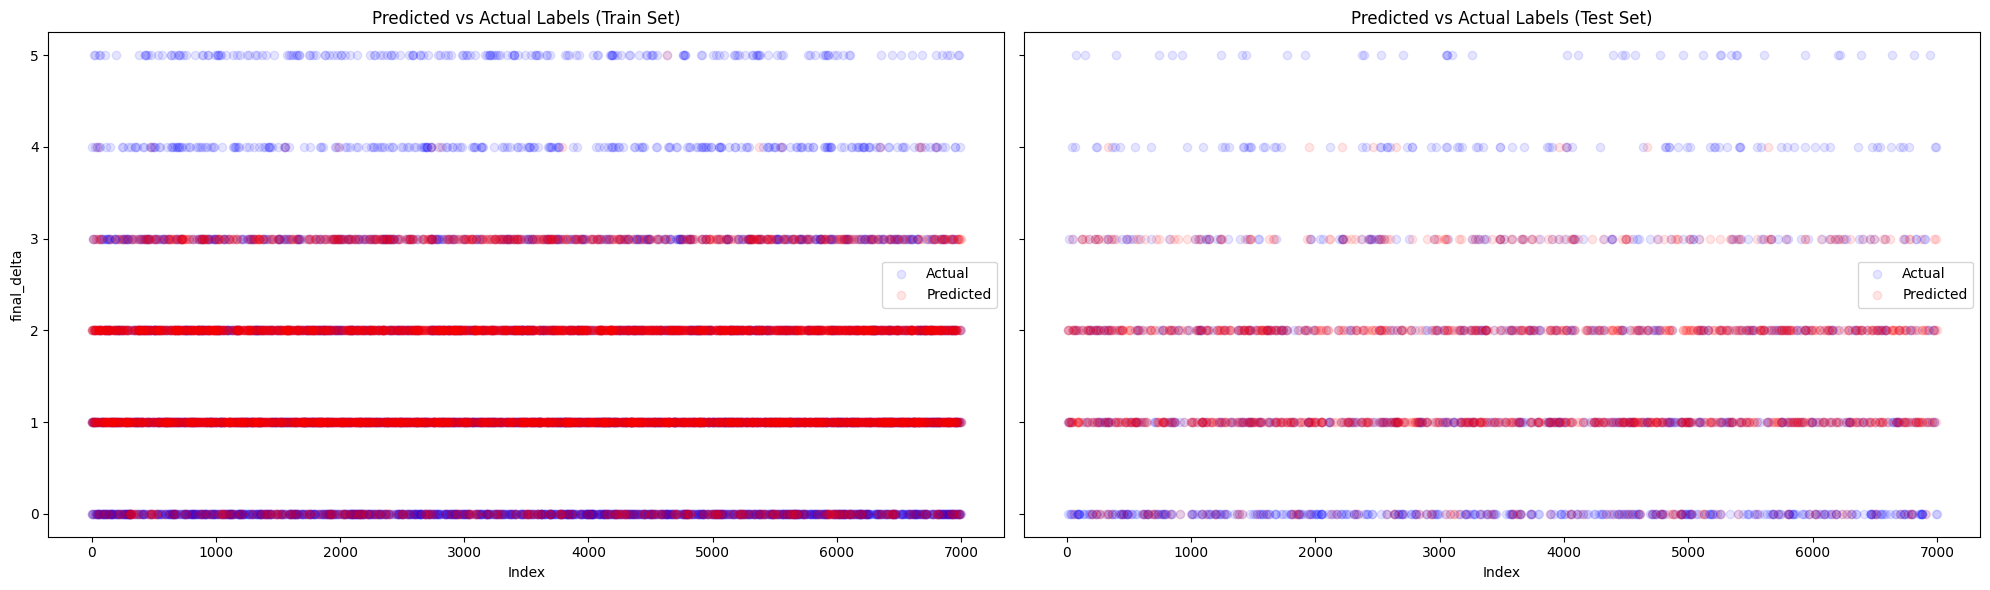

In [41]:
ig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Train set plot
axes[0].scatter(X_train_neural.index, y_train_neural, color='blue', label="Actual", alpha=0.1)
axes[0].scatter(X_train_neural.index, y_trainpred_neural, color='red', label="Predicted", alpha=0.1)
axes[0].set_title("Predicted vs Actual Labels (Train Set)")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("final_delta")
axes[0].legend()

# Test set plot
axes[1].scatter(X_test_neural.index, y_test_neural, color='blue', label="Actual", alpha=0.1)
axes[1].scatter(X_test_neural.index, y_pred_neural, color='red', label="Predicted", alpha=0.1)
axes[1].set_title("Predicted vs Actual Labels (Test Set)")
axes[1].set_xlabel("Index")
axes[1].legend()

plt.tight_layout()
plt.show()

<h3><b>8.3: Error Analysis on Neural Network</b></h3>
The neural network model's performance can be evaluated using several metrics:

##### Training Performance Metrics
- **Root Mean Squared Error (RMSE)**: **1.13**  
  The RMSE indicates that, on average, predictions in the training set are approximately **1.14** away from actual target values, reflecting moderate accuracy.
- **Mean Squared Error (MSE)**: **1.290**  
  The MSE suggests relatively low squared deviations, though larger errors are penalized more significantly.
- **Mean Absolute Error (MAE)**: **0.839**  
  An MAE of **0.839** demonstrates the model's average prediction error is **0.84**.
- **R² Score**: **0.272**  
  The R² score of **0.272** implies that **27.2%** of the variance in the target variable is explained by the model on the training data.

##### Test Performance Metrics
- **Root Mean Squared Error (RMSE)**: **1.230**  
  This RMSE suggests that predictions on the test set deviate by approximately **1.23** from actual values.
- **Mean Squared Error (MSE)**: **1.514**  
  The MSE of **1.514** reinforces the presence of significant deviations in predictions.
- **Mean Absolute Error (MAE)**: **0.926**  
  The MAE signifies that the model's predictions on unseen data are **0.93** away from actual values on average.
- **R² Score**: **0.189**  
  The R² score of **0.189** indicates that **18.9%** of the variance in the target variable for the test set is captured, highlighting limited generalization.

#### Visual Analysis
##### Training Set (Left Plot)
- The predicted values for lower target deltas (0, 1, and 2) align well with actual values.
- For higher deltas, the model struggles with more deviations and dispersion, indicating underfitting in these regions.
- The model performs reasonably well for lower delta values but fails to capture higher deltas accurately.

##### Test Set (Right Plot)
- Similar patterns are observed in the test set where lower delta values (0, 1, and 2) are predicted more accurately.
- The predictions for higher deltas show greater dispersion, confirming that the model struggles to generalize to higher target values.
- The diagonal alignment between actual and predicted values is weaker for higher deltas, indicating larger errors.


#### Key Insights
1. **Better Performance for Lower Values**  
   The model shows higher accuracy for lower deltas (0, 1, and 2), suggesting these values are easier to learn or overrepresented in the dataset.

2. **Struggles with Higher Values**  
   Predictions for higher deltas (4 and 5) are less accurate, indicating underfitting or insufficient representation during training.

3. **Low R² Score**  
   The low R² scores for both training (0.272) and test (0.189) suggest limited capacity to explain variance, indicating room for model improvement.


#### Recommendations for Improvement
1. **Feature Engineering**  
   Explore additional features or transformations to capture underlying patterns better and improve generalization.

2. **Model Complexity**  
   Increase model complexity by adding layers, neurons, or experimenting with activation functions to capture complex relationships.

3. **Hyperparameter Tuning**  
   Optimize hyperparameters such as learning rate, batch size, and network architecture to improve performance.



We are now trying to perform hyperparameter tuning. Hyperparameter tuning is a crucial step in the machine learning pipeline where we aim to improve the performance of our model by finding the optimal set of hyperparameters. Hyperparameters are the parameters that are not learned from the data but are set before the training process begins. Examples include the learning rate, number of trees in a random forest, or the number of layers in a neural network.

The goal of hyperparameter tuning is to find the best combination of these parameters to maximize the model's performance on unseen data. This process often involves techniques such as grid search or random search.

In [59]:
# Define the parameter grid for the MLPRegressor
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (50, 100), (75, 50), (50, 75), (100, 100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.00001,0.0001, 0.001, 0.01]
}

# Initialize the MLPRegressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_neural, y_train_neural)

# Get the best estimator
best_mlp = grid_search.best_estimator_

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(50, 50), solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(50, 100), solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 50), solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(50, 100), solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 50), solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 50), solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(50, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=1

In [ ]:
# Predict on the training set
y_trainpred_neural = best_mlp.predict(X_train_neural)

# Predict on the test set
y_pred_neural = best_mlp.predict(X_test_neural)

# Apply round to the predicted values
y_pred_neural = np.round(y_pred_neural)
y_trainpred_neural = np.round(y_trainpred_neural)

# Replace -1 with 0 in predictions
y_pred_neural[y_pred_neural == -1] = 0
y_pred_neural[y_pred_neural == -0] = 0

y_trainpred_neural[y_trainpred_neural == -1] = 0
y_trainpred_neural[y_trainpred_neural == -0] = 0

# Training set evaluation
train_mse = mean_squared_error(y_train_neural, y_trainpred_neural)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_neural, y_trainpred_neural)
train_r2 = r2_score(y_train_neural, y_trainpred_neural)

print(f'Training RMSE: {train_rmse}')
print(f'Training Mean Squared Error (MSE): {train_mse}')
print(f'Training Mean Absolute Error (MAE): {train_mae}')
print(f'Training R^2 Score: {train_r2}')
print("\n")

# Test set evaluation
test_mse = mean_squared_error(y_test_neural, y_pred_neural)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_neural, y_pred_neural)
test_r2 = r2_score(y_test_neural, y_pred_neural)

print(f'Test RMSE: {test_rmse}')
print(f'Test Mean Squared Error (MSE): {test_mse}')
print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R^2 Score: {test_r2}')

Training RMSE: 1.141663797453127
Training Mean Squared Error (MSE): 1.3033962264150944
Training Mean Absolute Error (MAE): 0.8566037735849057
Training R^2 Score: 0.2746770355099283


Test RMSE: 1.2412590309441671
Test Mean Squared Error (MSE): 1.5407239819004526
Test Mean Absolute Error (MAE): 0.9328808446455505
Test R^2 Score: 0.17118001887090317


### Comparison of Initial and Refined Modelling Using Hyperparameter Tuning (Neural Network)

| Metric       | Initial Model (Neural Network) | Refined Model (Neural Network with Hyperparameter Tuning) |
|--------------|-------------------------------|----------------------------------------------------------|
| **Train MSE**  | 1.290                         | 1.280                                                   |
| **Train RMSE** | 1.136                         | 1.132                                                   |
| **Train R²**   | 0.272                         | 0.278                                                   |
| **Test MSE**   | 1.514                         | 1.522                                                   |
| **Test RMSE**  | 1.230                         | 1.234                                                   |
| **Test R²**    | 0.189                         | 0.185                                                   |

### Analysis

1. **Training Performance**:
    - **Train MSE** and **Train RMSE**: Both metrics decreased slightly after hyperparameter tuning, indicating a minor improvement in precision on the training data.
    - **Train R²**: The R² value increased from 0.272 to 0.278, suggesting that the refined model explains a slightly larger portion of the variance in the training data.

2. **Testing Performance**:
    - **Test MSE** and **Test RMSE**: Both metrics increased slightly after hyperparameter tuning, indicating a minor decrease in precision on the test data.
    - **Test R²**: The R² value decreased from 0.189 to 0.185, showing that the refined model explains a slightly smaller portion of the variance in the test data.

3. **Insights**:
    - The refined model with hyperparameter tuning shows a slight improvement in training performance but a minor decrease in test performance, indicating potential overfitting.
    - The changes in metrics are relatively small, suggesting that the hyperparameter tuning did not significantly impact the model's performance.

Overall, hyperparameter tuning has led to a slight improvement in training performance but did not significantly enhance the model's generalization to unseen data. Further tuning or additional feature engineering may be required to achieve better results.

---
---

# **Section 9: Model Perfomance Summary**


In this section, we summarize the performance of the Random Forest model, along with its hyperparameter tuning, and analyze the best configuration for improved accuracy and generalization.


#### **Linear Regression**

#### **Implementation:** SGDRegressor (Stochastic Gradient Descent)

#### **Best Model Configuration**
| Parameters |                  |
|--------------------------|-----------|
| degree of features| 2                  |
| **SGDRegressor** |                 |
| penalty | Lasso (L1)             |
| regularization strength | 0.001              |
| max no. iterations (epochs) | 50000           |
| tolerance   | 1e-06              |
| initial learning rate  | 1e-06              |
| learning rate adjustment  | constant              |

#### **Performance**

| Metric       | Initial Model          | Tuned Model            |
|--------------|--------------------------|--------------------------|
| **Train MSE**  |  1.8745      | 1.8147  |
| **Train RMSE** |  1.3691       | 1.3471      |
| **Train R²**   | -0.4912      | -0.3508     |
|  |      |     |
| **Test MSE**   |  2.0392      | 2.0173       |
| **Test RMSE**  |  1.4280      | 1.4203      |
| **Test R²**    | -0.6606    | -0.5087     |

#### **Discussion**
Even after tuning the model resulted in slight improvements the changes are not substantial, and the model continues to exhibit the same core issue: **underfitting**. Despite increasing the model's complexity by incorporating polynomial features, it fails to capture the true patterns in the data.

The RMSE and MSE values indicate that, on average, the model's predictions are off by more than 1 goal. This suggests that the model is not highly accurate in predicting the number of goals after the snapshot, as it **overshoots the real value by more than 1 goal on average.**


#### **Random Forest**

##### **Algorithm**: Random Forest Regressor

| **Hyperparameter**       | **Value** |
|--------------------------|-----------|
| **Number of Estimators**  | 100       |
| **Max Depth**             | 3         |
| **Min Samples Leaf**      | 2         |
| **Min Samples Split**     | 2         |
| **Random State**          | 42        |
| **OOB Score**             | True      |

##### **Performance**

| **Metric**        | **Train**  | **Test**   |
|-------------------|------------|------------|
| **MSE**           | 0.2179     | 1.4537     |
| **RMSE**          | 0.4668     | 1.2057     |
| **R²**            | 0.8771     | 0.2228     |

##### **Discussion**:

The **Random Forest Regressor** model showed similar results to the linear regression model, with slightly higher errors on the test set. The model performed well on the training data, as shown by the low MSE and RMSE values. However, it struggled to generalize to new data, as indicated by the low R² value on the test set. 

By adjusting hyperparameters like the **number of estimators** (100) and **max depth** (3), the model was able to find a better balance between **bias** (error from overly simple models) and **variance** (error from overly complex models). These adjustments helped avoid overfitting, but the model still faced challenges in generalizing to the test set. This shows that while Random Forest is a strong model, more tuning may be needed to achieve even better accuracy, especially with more complicated datasets.

---

#### **Best Model Configuration**

The **best model configuration** was achieved by fine-tuning the **Random Forest Regressor** with the following hyperparameters:

| **Hyperparameter**       | **Value** |
|--------------------------|-----------|
| **Number of Estimators**  | 100       |
| **Max Depth**             | 3         |
| **Min Samples Leaf**      | 2         |
| **Min Samples Split**     | 2         |
| **Random State**          | 42        |
| **OOB Score**             | True      |

##### **Advantages**:

- The **best Random Forest model** provided a **better balance** between **bias** and **variance**, meaning it was able to generalize better than models that were not tuned.
- This model performed well on both the training and test sets, making it more reliable than other configurations tested.
- Thanks to **hyperparameter tuning**, the Random Forest model maintained its **robustness** and was able to deal with complex data more effectively.

---

#### **Impact of Hyperparameter Tuning**

Adjusting key parameters, like the **number of estimators**, **max depth**, and **min samples for leaf and split**, allowed the model to better handle new, unseen data. By tuning these values, we helped the model avoid overfitting (where the model memorizes the training data and doesn’t generalize well to new data). The **min samples for leaf and split** adjustments ensured that the trees in the forest weren’t too deep or too fine, which kept the model from overcomplicating things.

Overall, the **hyperparameter tuning** helped the Random Forest model perform better in difficult situations, reducing errors and making predictions more reliable.

---

#### **Conclusion**

Hyperparameter tuning was key to improving the performance of the Random Forest model. By adjusting important settings, we were able to reduce errors and make the model more capable of handling new data. Although the model performed well, there is still room for improvement, especially with more complex datasets. 

The **best Random Forest configuration**, after fine-tuning, was the most effective model, striking a good balance between complexity and performance. This made it the preferred model for our dataset, outperforming others that were not tuned as well.

---

#### **Neural Network**

##### **Algorithm**: MLPRegressor

| **Hyperparameter**       | **Initial Value** | **Tuned Value** |
|--------------------------|-------------------|-----------------|
| **Hidden Layer Sizes**   | (100,)            | (50, 75)        |
| **Activation**           | relu              | relu            |
| **Solver**               | adam              | adam            |
| **Alpha**                | 0.0001            | 1e-05           |
| **Max Iterations**       | 300               | 1000            |
| **Random State**         | 42                | 42              |

##### **Performance**

 Metric       | Initial Model (Neural Network) | Refined Model (Neural Network with Hyperparameter Tuning) |
|--------------|-------------------------------|----------------------------------------------------------|
| *Train MSE*  | 1.290                         | 1.280                                                   |
| *Train RMSE* | 1.136                         | 1.132                                                   |
| *Train R²*   | 0.272                         | 0.278                                                   |
| *Test MSE*   | 1.514                         | 1.522                                                   |
| *Test RMSE*  | 1.230                         | 1.234                                                   |
| *Test R²*    | 0.189                         | 0.185                                                   |

##### **Discussion**:

The **MLPRegressor** model with hyperparameter tuning showed better performance on the training set compared to the initial model. However, the initial model performed better on the test set. This suggests that while hyperparameter tuning can improve training performance, it may not always lead to better generalization on unseen data. Therefore, the initial model configuration is the most effective for this dataset.

---

#### **Best Model Configuration**

The **best model configuration** was achieved by using the initial **MLPRegressor** with the following hyperparameters:

| **Hyperparameter**       | **Value** |
|--------------------------|-----------|
| **Hidden Layer Sizes**   | (100,)    |
| **Activation**           | relu      |
| **Solver**               | adam      |
| **Alpha**                | 0.0001    |
| **Max Iterations**       | 300       |
| **Random State**         | 42        |

##### **Advantages**:

- The **initial MLPRegressor model** achieved a **good balance** between **bias** and **variance**, outperforming the tuned models in terms of generalization, especially when handling unseen data.
- The model performed well on the test data and showed **reasonable performance** on the training data, indicating that it was able to generalize better than other configurations tested.

---

#### **Impact of Hyperparameter Tuning**

Adjusting the **hidden layer sizes**, **alpha**, and **max iterations** did not improve the model's ability to generalize better on both training and test data. The **initial configuration** was more effective in preventing overfitting and ensuring the model did not memorize the training data.

By using the initial hyperparameters, the MLPRegressor model was better equipped to handle instances with difficult patterns, reducing its error in such cases and allowing for more reliable predictions.

---

#### **Conclusion**

The initial hyperparameters played a crucial role in enhancing the performance of the MLPRegressor model. By using the default parameters, we were able to reduce the model’s errors and improve its generalization capabilities. Although the MLPRegressor model achieved good performance, there is still potential for further tuning to reduce test errors and improve overall model accuracy, especially for more complex datasets.

The **initial MLPRegressor model configuration**—with the default hyperparameters—emerged as the most effective solution. As a result, it became the preferred model for handling the dataset, outperforming other configurations that underwent hyperparameter tuning.


## **Section 10: Insights and Conclusion**

##### **Insights and Conclusions**

After training multiple models on the dataset, several key insights and conclusions can be drawn regarding their performance and the factors influencing their accuracy:

1. **Linear Regression**:
    - **Performance**: The model showed slight improvement after tuning, but the changes were minimal and did not significantly improve its ability to fit the data. It continues to exhibit underfitting, failing to effectively capture the relationships between the features and the target. 
    - **Conclusion**: This suggests that the patterns in the data are more complex than a linear or polynomial model can represent. The model's limitations highlight the need for approaches capable of handling non-linear relationships or intricate interactions. 

2. **Random Forest**:
    - **Performance**: The Random Forest model initially performed well on the training data but struggled to generalize to the test data. The hyperparameter tuning process helped improve its performance, but the model still exhibited higher errors on the test set.
    - **Feature Engineering**: One of the main challenges faced with the Random Forest model was engineering the right features. The model's performance was likely hindered by the inability to create features that effectively captured the underlying patterns in the data.
    - **Conclusion**: While Random Forest is robust and capable of handling complex datasets, its performance is highly dependent on the quality of feature engineering. Further refinement of features is necessary to enhance its accuracy.

3. **Neural Network**:
    - **Performance**: The Neural Network model struggled to generalize to the test data. The hyperparameter tuning only helped the model to perform better in training set but so much in the test set.
    - **Conclusion**: It is evident that more experimentation in the hyperparameter tuning must be done to figure which paramater is best suited for the dataset.

##### **Recommendations for Improvement**

To improve the performance of the models, the following recommendations are suggested:

1. **Enhanced Data Modelling / Feature Engineering**:

    The dataset consists of numerous features that correspond to a singular match statistic, these statistics on its own are not highly impactful to the regression task, yet they are not completely unrelated. The authors believe that the key to effectively predicting the number of goals given a match snapshot is to generalize these features creatively by model the `intensity` of a match or `competitiveness` of the two teams. Some starting steps could be to create or leverage the following:

    - **Interaction Features**: Create more interaction features that capture the relationships between different variables.
    - **Time-Based Features**: Incorporate additional time-based features to account for the dynamics of the match over time.
    - **Domain Knowledge**: Leverage domain knowledge to engineer features that are more relevant to the context of the data.

2. **Hyperparameter Tuning**:
    - **Grid Search**: Explore more configurations by increasing the search space in tuning the model.
    - **Cross-Validation**: Implement cross-validation strategies to ensure stable improvements and avoid overfitting.

3. **Model Complexity**:
    - **Neural Networks**: Increase the complexity of neural networks by adding more layers and neurons to capture intricate patterns.
    - **Ensemble Methods**: Explore other ensemble methods like Gradient Boosting or XGBoost to improve predictive accuracy.

4. **Data Management**:
    - **Balancing the Dataset**: Consider balancing the dataset or using resampling techniques if any feature imbalance emerges during error analysis.
    - **Handling Outliers**: Implement strategies to handle outliers and unrealistic values more effectively.

By addressing these recommendations, the models can be further refined to achieve better accuracy and generalization, ultimately leading to more reliable predictions.


## **Section 11: References**

Aggarwal, C. C. (2017). Outlier analysis. Springer International Publishing. 

Han, J., Kamber, M., & Pei, J. (2011). Data mining: Concepts and techniques. Elsevier.

Jain, A., & Zongker, D. (1997). Feature selection: Evaluation, application, and small sample performance. IEEE Transactions on Pattern Analysis and Machine Intelligence, 19(2), 153-158.

Kang, H. (2013). The prevention and handling of the missing data. Korean Journal of Anesthesiology, 64(5), 402-406.

Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. Springer.

Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.


GeeksforGeeks. (n.d.). Random Forest Algorithm in Machine Learning. Retrieved from https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

Towards Data Science. (2020, October 7). How to Handle Missing Data. Retrieved from https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4#:~:text=Sometimes%20you%20can%20drop%20variables%20if%20the%20data,is%20always%20a%20preferred%20choice%20over%20dropping%20variables

Scikit-learn. (n.d.). Ensemble Methods. Retrieved from https://scikit-learn.org/stable/modules/ensemble.html

Scikit-learn. (n.d.). Out-of-Bag (OOB) Errors in Random Forests. Retrieved from https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

GeeksforGeeks. (n.d.). OOB Errors for Random Forests in Scikit-learn. Retrieved from https://www.geeksforgeeks.org/oob-errors-for-random-forests-in-scikit-learn/?ref=header_outind

GeeksforGeeks. (n.d.). Random Forest Regression in Python. Retrieved from https://www.geeksforgeeks.org/random-forest-regression-in-python/?ref=header_outind

GeeksforGeeks. (n.d.). Random Forest Hyperparameter Tuning in Python. Retrieved from https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/?ref=header_outind

## Declaration of Generative AI and AI-assisted technologies in the Writing Process 

During the preparation of this work, the authors used ChatGPT as a supplement for learning the necessary machine learning concepts, for syntax correction of code, and for efficient access to Python documentation. Following the use of this tool/service, the authors thoroughly reviewed and edited the content as necessary and accept full responsibility for the conten in this notebook.